Tim: I gusti Putu Ardan Setiawan.
# Exploratory Data Analysis 

## Objective
Notebook ini bertujuan untuk:
1. Memahami struktur dan karakteristik data transaksi
2. Memvalidasi kualitas dan logika bisnis data
3. Menghasilkan insight yang relevan untuk:
   - Transaction Classification
   - User Behavior Clustering
   - Financial Health Scoring

EDA dilakukan dengan pendekatan **business-driven & ML-ready**, 
bukan sekadar visualisasi statistik.


In [ ]:
# 1. Core Data Manipulation
import pandas as pd
import numpy as np
import datetime as dt
import joblib

# 2. Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from  matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 3. Utilities
import warnings

# Suppress Warnings (Untuk menjaga kebersihan output)
warnings.filterwarnings('ignore')



## 1. Load & Data Overview

Pada tahap awal ini dilakukan proses pemuatan dataset untuk memahami struktur dasar data.
Langkah yang dilakukan meliputi:
- memuat dataset menggunakan pandas
- melihat contoh data
- memeriksa jumlah baris dan kolom
- mengidentifikasi nama kolom dan tipe data

Tahapan ini bertujuan untuk memberikan pemahaman awal terhadap data sebelum dilakukan proses pembersihan dan analisis lebih lanjut.


In [251]:
# Load datasets
df_personas = pd.read_csv('../data/Personas.csv')
df_transactions = pd.read_csv('../data/transactions.csv')
df_products = pd.read_csv('../data/Products_master.csv')
df_items = pd.read_csv('../data/transaction_items.csv')

#### 1.1 Overview Data
- Inspeksi Awal Data
  1. .head() untuk melihat bentuk data, dan
  2. .info() untuk mengecek tipe data serta nilai yang hilang


#### Overview df_personas

In [252]:
# Liat 10 baris pertama
df_personas.head(10)

,persona_id,cluster,age,city,job,marital_status,household_size,monthly_income,tech_usage,spending_style,salary_day,daily_cap,tx_mean,start_date
0,P001,survival_spender,21,Yogyakarta,Mahasiswa,Single,1,1850000,High,Survival,1,65000,0.8,2021-02-15
1,P002,survival_spender,22,Semarang,Mahasiswa,Single,1,2100000,High,Survival,1,75000,0.9,2021-03-10
2,P003,survival_spender,24,Medan,Freelancer,Single,1,3200000,High,Survival,25,110000,1.1,2020-09-09
3,P004,survival_spender,23,Surabaya,Pegawai Swasta,Single,1,4800000,Medium,Survival,25,155000,1.2,2021-06-12
4,P005,survival_spender,20,Bandung,Mahasiswa,Single,1,1950000,High,Survival,1,70000,0.7,2022-01-20
5,P006,survival_spender,28,Jakarta,Pegawai Swasta,Married,3,5500000,Medium,Survival,25,180000,1.5,2020-11-05
6,P007,survival_spender,19,Yogyakarta,Mahasiswa,Single,1,1600000,High,Survival,1,55000,0.6,2021-08-14
7,P008,survival_spender,25,Denpasar,Pegawai Swasta,Single,1,3400000,Low,Survival,28,120000,0.9,2021-05-30
8,P009,survival_spender,31,Medan,Ibu Rumah Tangga,Married,4,4100000,Low,Survival,30,145000,1.8,2020-04-12
9,P010,survival_spender,22,Jakarta,Freelancer,Single,1,4200000,High,Survival,15,145000,1.3,2022-02-11


In [253]:
# menapilkan Informasi mengenai Datasets
df_personas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   persona_id      200 non-null    object 
 1   cluster         200 non-null    object 
 2   age             200 non-null    int64  
 3   city            200 non-null    object 
 4   job             200 non-null    object 
 5   marital_status  200 non-null    object 
 6   household_size  200 non-null    int64  
 7   monthly_income  200 non-null    int64  
 8   tech_usage      200 non-null    object 
 9   spending_style  200 non-null    object 
 10  salary_day      200 non-null    int64  
 11  daily_cap       200 non-null    int64  
 12  tx_mean         200 non-null    float64
 13  start_date      200 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


In [254]:
# Konsistensi kategori dan Penulisan.

col_category = ['cluster', 'marital_status','city', 'job', 'spending_style', 'household_size']

for col in col_category:
    print(f'{col} : {df_personas[col].unique()}')

cluster : ['survival_spender' 'balanced_spender' 'lifestyle_spender'
 'disciplined_saver']
marital_status : ['Single' 'Married']
city : ['Yogyakarta' 'Semarang' 'Medan' 'Surabaya' 'Bandung' 'Jakarta' 'Denpasar']
job : ['Mahasiswa' 'Freelancer' 'Pegawai Swasta' 'Ibu Rumah Tangga' 'Wirausaha']
spending_style : ['Survival' 'Balanced' 'Lifestyle' 'Saver']
household_size : [1 3 4 2]


#### Overview df_transaction

In [255]:
df_transactions.head(10)

,persona_id,date,amount,merchant,category,payment_method,bank,tx_type,description,balance_after,transaction_id
0,P164,2025-01-01 08:12:00,69619,Modern Retail,Beverages,Cash,NaN,debit,Transaksi di Modern Retail,14930381,TX000001
1,P030,2025-01-01 08:42:00,75429,Pasar Tradisional,Groceries,Debit,Mandiri,debit,Transaksi di Pasar Tradisional,3924571,TX000002
2,P162,2025-01-01 08:55:00,36858,Warung Kelontong,Groceries,QRIS,BCA,debit,Transaksi di Warung Kelontong,15463142,TX000003
3,P035,2025-01-01 09:17:00,53798,Gramedia,Entertainment,Transfer,Mandiri,debit,Transaksi di Gramedia,2246202,TX000004
4,P189,2025-01-01 09:43:00,8728,Orang Tua,Snacks,Cash,NaN,debit,Transaksi di Orang Tua,27991272,TX000005
5,P069,2025-01-01 10:20:00,25728,Delfi,Snacks,Debit,BNI,debit,Transaksi di Delfi,5474272,TX000006
6,P118,2025-01-01 10:24:00,163792,Inul Vizta,Entertainment,Transfer,BNI,debit,Transaksi di Inul Vizta,6636208,TX000007
7,P102,2025-01-01 11:48:00,279885,Watsons,Personal Care,Debit,Mandiri,debit,Transaksi di Watsons,13520115,TX000008
8,P041,2025-01-01 11:53:00,192978,Lawson,Dining Out,Cash,NaN,debit,Transaksi di Lawson,3207022,TX000009
9,P044,2025-01-01 11:55:00,1190992,3Second Store,Fashion,Cash,NaN,debit,Transaksi di 3Second Store,10009008,TX000010


In [256]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17127 entries, 0 to 17126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   persona_id      17127 non-null  object
 1   date            17127 non-null  object
 2   amount          17127 non-null  int64 
 3   merchant        17127 non-null  object
 4   category        17127 non-null  object
 5   payment_method  17127 non-null  object
 6   bank            11267 non-null  object
 7   tx_type         17127 non-null  object
 8   description     17127 non-null  object
 9   balance_after   17127 non-null  int64 
 10  transaction_id  17127 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.4+ MB


In [257]:
# Menghitung jumlah merchant yang unik
jumlah_merchant = df_transactions['merchant'].nunique()

# Menghitung jumlah kategori yang unik
jumlah_kategori = df_transactions['category'].nunique()

print(f"Jumlah Merchant Unik: {jumlah_merchant}")
print(f"Jumlah Kategori Unik: {jumlah_kategori}")


Jumlah Merchant Unik: 341
Jumlah Kategori Unik: 11


In [258]:
# Konsistensi Kategori dan penulisan

col_category = ['category', 'payment_method']

for col in col_category:
    print(f'{col}: {df_transactions[col].unique()}')

category: ['Beverages' 'Groceries' 'Entertainment' 'Snacks' 'Personal Care'
 'Dining Out' 'Fashion' 'Baby Care' 'Billing & Utilities' 'Frozen Food'
 'Beauty Care']
payment_method: ['Cash' 'Debit' 'QRIS' 'Transfer']


#### Overview df_products

In [259]:
df_products.head(10)

,product_id,product_name,merchant,item_type,category,price_min,price_max
0,1,MamyPoko Pants X-Tra Kering S-40,Modern Retail,Needs,Baby Care,52000,60000
1,2,MamyPoko Pants X-Tra Kering M-34,Modern Retail,Needs,Baby Care,52000,60000
2,3,MamyPoko Pants X-Tra Kering L-30,Modern Retail,Needs,Baby Care,52000,60000
3,4,MamyPoko Pants X-Tra Kering XL-26,Modern Retail,Needs,Baby Care,52000,60000
4,5,MamyPoko Pants X-Tra Kering XXL-24,Modern Retail,Needs,Baby Care,52000,60000
5,6,Sweety Silver Pants M-30,Modern Retail,Needs,Baby Care,48000,55000
6,7,Sweety Silver Pants L-28,Modern Retail,Needs,Baby Care,48000,55000
7,8,Merries Pants Good Skin M-34,Kao Official,Needs,Baby Care,55000,65000
8,9,Makuku Air Diapers Comfort Fit M-32,Modern Retail,Needs,Baby Care,50000,60000
9,10,Baby Happy Body Fit Pants M-34,Wings Official,Needs,Baby Care,45000,52000


In [260]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1443 non-null   int64 
 1   product_name  1443 non-null   object
 2   merchant      1443 non-null   object
 3   item_type     1443 non-null   object
 4   category      1443 non-null   object
 5   price_min     1443 non-null   int64 
 6   price_max     1443 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 79.0+ KB


In [261]:
# Konsitensi kategori dan penlisan

cols = ['category', 'item_type']

for col in cols:
    print (f'{col} : {df_products[col].unique()}')

category : ['Baby Care' 'Beauty Care' 'Beverages' 'Billing & Utilities' 'Dining Out'
 'Entertainment' 'Frozen Food' 'Groceries' 'Personal Care' 'Snacks'
 'Fashion']
item_type : ['Needs' 'Wants' 'Need' 'Want']


In [262]:
# Jumlah Product Unik dalam data

col_count = ['product_name', 'merchant']

for col in col_count:
    print(f'{col} : {df_products[col].nunique()}')

product_name : 1439
merchant : 368


#### Overview df_items

In [263]:
df_items.head(10)

,persona_id,product_id,product_name,category,item_type,quantity,unit_price,total_price,transaction_date,transaction_id,transaction_item_id
0,P001,457,Mie Gacoan Udang Keju 3 Pcs,Dining Out,Wants,3,10839,32517,2025-01-01 19:17:00,TX000035,TI0000001
1,P001,549,J.CO Iced Jcoccino Regular,Dining Out,Wants,1,37278,37278,2025-01-01 19:17:00,TX000035,TI0000002
2,P001,1016,Sabun Asepso Sulphur 80gr,Personal Care,Needs,2,8440,16880,2025-01-03 17:27:00,TX000135,TI0000003
3,P001,1078,Hers Protex Daily Comfort 20 Pads,Personal Care,Needs,1,12418,12418,2025-01-03 17:27:00,TX000135,TI0000004
4,P001,1149,Hello Panda Chocolate 45g,Snacks,Wants,2,10235,20470,2025-01-07 11:32:00,TX000360,TI0000005
5,P001,1175,Fitbar Chocolate 22g,Snacks,Wants,2,6736,13472,2025-01-07 11:32:00,TX000360,TI0000006
6,P001,1139,Beng Beng Share It Pouch 95g,Snacks,Wants,3,13177,39531,2025-01-07 11:32:00,TX000360,TI0000007
7,P001,850,Saus Sambal ABC Asli Ekstra Pedas Botol 135ml,Groceries,Needs,1,10075,10075,2025-01-07 19:41:00,TX000389,TI0000008
8,P001,287,Evian Natural Mineral Water 330ml,Beverages,Wants,1,22729,22729,2025-01-08 11:08:00,TX000414,TI0000009
9,P001,320,Ale-Ale Jeruk Cup 190ml,Beverages,Wants,1,1360,1360,2025-01-08 11:08:00,TX000414,TI0000010


In [264]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39194 entries, 0 to 39193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   persona_id           39194 non-null  object
 1   product_id           39194 non-null  int64 
 2   product_name         39194 non-null  object
 3   category             39194 non-null  object
 4   item_type            39194 non-null  object
 5   quantity             39194 non-null  int64 
 6   unit_price           39194 non-null  int64 
 7   total_price          39194 non-null  int64 
 8   transaction_date     39194 non-null  object
 9   transaction_id       39194 non-null  object
 10  transaction_item_id  39194 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [265]:
# Hitung Jumlah Items unik dalam data

col_count = ['product_name', 'category']

for col in col_count:
    print(f'{col} : {df_items[col].nunique()}')

product_name : 1420
category : 11


In [266]:
# Cek Konsistensi Kategori dan penulisan

col_category = 'category'

print (f'{col_category} : {df_items[col_category].unique()}')

category : ['Dining Out' 'Personal Care' 'Snacks' 'Groceries' 'Beverages' 'Fashion'
 'Entertainment' 'Frozen Food' 'Billing & Utilities' 'Beauty Care'
 'Baby Care']


#### 1.2 Statistik Deskriptif
- .describe() untuk melihat ringkasan angka (rata-rata, mendian, min dan max).

#### Ringkasan Statistik df_personas 

In [267]:
df_personas.describe()

,age,household_size,monthly_income,salary_day,daily_cap,tx_mean
count,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,29.345000,1.915000,1.123850e+07,17.540000,346200.000000,2.414000
std,5.532542,1.083348,7.881592e+06,10.399478,236451.318733,0.984862
min,18.000000,1.000000,1.600000e+06,1.000000,55000.000000,0.600000
25%,25.000000,1.000000,4.800000e+06,10.000000,163750.000000,1.600000
50%,29.000000,1.000000,8.650000e+06,20.000000,280000.000000,2.500000
75%,33.000000,3.000000,1.627500e+07,25.000000,465000.000000,3.025000
max,47.000000,4.000000,3.500000e+07,30.000000,1000000.000000,4.400000


#### Ringkasan Statistik df_transactioscations

In [268]:
df_transactions.describe()

,amount,balance_after
count,1.712700e+04,1.712700e+04
mean,3.713650e+05,1.843894e+07
std,1.210179e+06,2.463677e+07
min,6.850000e+02,1.560000e+02
25%,4.418350e+04,3.153565e+06
50%,9.801400e+04,9.000623e+06
75%,2.091235e+05,2.317559e+07
max,2.293404e+07,1.869966e+08


#### Ringkasan Statistik df_items

In [269]:
df_items.describe()

,product_id,quantity,unit_price,total_price
count,39194.000000,39194.000000,3.919400e+04,3.919400e+04
mean,732.040108,1.990738,8.451840e+04,1.622791e+05
std,366.640409,0.817761,3.272506e+05,6.488365e+05
min,1.000000,1.000000,5.030000e+02,5.030000e+02
25%,434.000000,1.000000,9.219000e+03,1.595400e+04
50%,780.000000,2.000000,1.928500e+04,3.546800e+04
75%,1072.000000,3.000000,4.204875e+04,8.224200e+04
max,1443.000000,3.000000,6.163342e+06,1.654135e+07


#### Ringkasan Statistik df_products

In [270]:
df_products.describe()

,product_id,price_min,price_max
count,1443.000000,1.443000e+03,1.443000e+03
mean,722.000000,1.637189e+05,2.277954e+05
std,416.702532,4.823118e+05,7.378896e+05
min,1.000000,5.000000e+02,9.000000e+02
25%,361.500000,1.500000e+04,1.900000e+04
50%,722.000000,3.200000e+04,3.900000e+04
75%,1082.500000,7.975000e+04,1.000000e+05
max,1443.000000,5.302000e+06,1.000000e+07


## Data Integration & Integrity Audit (Pondasi)

In [271]:
# Cek apakah persona_id unik
df_personas["persona_id"].is_unique

True

In [272]:
# Ambil semua persona_id unik
persona_ids = set(df_personas["persona_id"])
transaction_ids = set(df_transactions["persona_id"])

# 1. Cari transaksi dengan persona_id yang tidak valid
orphan_ids = transaction_ids - persona_ids

print (f"Jumlah persona id yang tidak sesuai dengan persona id di transaction: {len(orphan_ids)}")


Jumlah persona id yang tidak sesuai dengan persona id di transaction: 0


In [273]:
# 2. Cek 'Ghost Items' (Item yang Transaction ID-nya tidak ada di tabel Transaksi)
valid_tx_ids = set(df_transactions['transaction_id'])
orphan_items = df_items[~df_items['transaction_id'].isin(valid_tx_ids)]

print(f"Jumlah Item 'Hantu' (Tanpa Header Transaksi): {len(orphan_items)}")

Jumlah Item 'Hantu' (Tanpa Header Transaksi): 0


In [274]:
# 3. Cek Konsistensi Matematika (Header vs Detail)
# Hitung total per struk dari tabel items
items_sum = df_items.groupby('transaction_id')['total_price'].sum().reset_index()
items_sum.rename(columns={'total_price': 'sum_items'}, inplace=True)

# Gabung dengan tabel transaksi untuk dibandingkan
compare = pd.merge(df_transactions[['transaction_id', 'amount']], items_sum, on='transaction_id', how='inner')
compare['diff'] = compare['amount'] - compare['sum_items']

# Toleransi selisih Rp 1 (karena pembulatan koma)
mismatch = compare[abs(compare['diff']) > 1]

print(f"Jumlah Transaksi dengan Total Harga Tidak Cocok (Header != Sum Items): {len(mismatch)}")

if len(mismatch) > 0:
    print("Contoh Ketidakcocokan:")
    display(mismatch.head())
else:
    print("STATUS: Data Items Konsisten")

Jumlah Transaksi dengan Total Harga Tidak Cocok (Header != Sum Items): 0
STATUS: Data Items Konsisten


##### insgith Integration & Integrity
Hasil Audit Integritas & Referensial Data: (Personas, Transactions, Transaction Items),
dataset terintegritas 100%.
1. Referential Integrity: Tidak ditemukan Orphan Data (Data Yatim). Seluruh 17.000+ transaksi terpetakan secara valid ke persona_id yang terdaftar, dan seluruh 39.000+ item transaksi memiliki header transaksi yang valid. 
2. Mathematical Consistency: Validasi silang antara nilai header transaksi (Amount) dengan total kalkulasi item (Quantity $\times$ Unit Price) menunjukkan tingkat akurasi 100% (selisih = 0).
 
Kesimpulan: Dataset memiliki struktur relasional yang kokoh dan valid secara matematis, sehingga aman untuk digunakan dalam proses Feature Engineering dan Modeling selanjutnya.

##### Logic Consistency (Cek Logika Waktu)

In [275]:
# Pastikan format tanggal sudah datetime
df_personas['start_date'] = pd.to_datetime(df_personas['start_date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# 1. Gabungkan Tanggal Join User ke Tabel Transaksi
# Kita hanya butuh kolom 'start_date' dari Personas
df_logic_check = pd.merge(df_transactions[['transaction_id', 'persona_id', 'date']], 
                          df_personas[['persona_id', 'start_date']], 
                          on='persona_id', 
                          how='left')

# 2. Deteksi Anomali Waktu (Transaction Date < Start Date)
# Kita beri toleransi 0 hari (harus benar-benar valid)
invalid_logic = df_logic_check[df_logic_check['date'] < df_logic_check['start_date']]

print(f"=== LOGIC CONSISTENCY CHECK ===")
print(f"Total Transaksi Diperiksa: {len(df_logic_check)}")
print(f"Jumlah Transaksi 'Time Paradox' (Invalid): {len(invalid_logic)}")

if len(invalid_logic) > 0:
    print("\nWARNING: Ditemukan transaksi yang terjadi sebelum user mendaftar!")
    print("Contoh Data Invalid:")
    display(invalid_logic.head())
    
    # Rekomendasi Action:
    print("\nREKOMENDASI: Data ini sebaiknya di-drop (dihapus) agar tidak merusak fitur 'Tenure'.")
else:
    print("\nSTATUS: AMAN! Alur waktu logis (Semua transaksi terjadi setelah user join).")

=== LOGIC CONSISTENCY CHECK ===
Total Transaksi Diperiksa: 17127
Jumlah Transaksi 'Time Paradox' (Invalid): 0

STATUS: AMAN! Alur waktu logis (Semua transaksi terjadi setelah user join).


#### Aggregation & Master Merging 

In [276]:
# --- LANGKAH 1: DARI ITEMS KE TRANSAKSI (Basket Analysis) ---
# Kita ingin tahu: Dalam 1 struk, rata-rata ada berapa barang?
# Group by Transaction ID
basket_agg = df_items.groupby('transaction_id').agg({
    'transaction_item_id': 'count',  # Menghitung jumlah item
    'category': lambda x: x.mode()[0] if not x.mode().empty else 'Mixed' # Kategori dominan (Opsional, buat info aja)
}).reset_index()

basket_agg.rename(columns={'transaction_item_id': 'basket_size', 'category': 'top_category'}, inplace=True)

# Tempelkan info basket size ke tabel transaksi utama
df_trans_enriched = pd.merge(df_transactions, basket_agg, on='transaction_id', how='left')

# Isi NaN dengan 0 (jaga-jaga ada transaksi tanpa item)
df_trans_enriched['basket_size'] = df_trans_enriched['basket_size'].fillna(0)

print(f"1. Basket Analysis Selesai. Rata-rata item per struk: {df_trans_enriched['basket_size'].mean():.2f} item")




1. Basket Analysis Selesai. Rata-rata item per struk: 2.29 item


In [277]:
# --- LANGKAH 2: DARI TRANSAKSI KE USER (Behavior Profiling) ---
# Ini menjawab request Anda: Tenure dari Tgl Pertama s/d Terakhir Transaksi
user_behavior = df_trans_enriched.groupby('persona_id').agg({
    'transaction_id': 'count',           # Frequency (Seberapa sering?)
    'amount': ['sum', 'mean', 'max'],    # Monetary (Total, Rata2, Max Belanja)
    'basket_size': 'mean',               # Average Basket Size (Belanjaan dia biasanya banyak/dikit?)
    'date': [
        lambda x: (x.max() - x.min()).days, # Tenure (Durasi Aktif dalam Hari)
        lambda x: (df_trans_enriched['date'].max() - x.max()).days # Recency (Berapa hari lalu terakhir belanja?)
    ]
})

# Merapikan nama kolom (Flatten MultiIndex)
user_behavior.columns = [
    'frequency', 
    'total_spend', 'avg_ticket_size', 'max_spend', 
    'avg_basket_size', 
    'active_tenure_days', 'recency_days'
]
user_behavior.reset_index(inplace=True)

# --- LANGKAH 3: MERGING KE MASTER DATA (The Final Table) ---
# Gabungkan Demografi (Personas) + Perilaku (Behavior)
df_master = pd.merge(df_personas, user_behavior, on='persona_id', how='left')

# --- LANGKAH 4: POST-MERGE CLEANUP ---
# User yang baru daftar tapi belum belanja akan jadi NaN. Kita isi 0.
cols_to_fill = ['frequency', 'total_spend', 'avg_ticket_size', 'max_spend', 
                'avg_basket_size', 'active_tenure_days', 'recency_days']
df_master[cols_to_fill] = df_master[cols_to_fill].fillna(0)

In [278]:
# Rumus: Total Belanja Setahun / (Gaji Sebulan * 12)
df_master['annual_income_est'] = df_master['monthly_income'] * 12
df_master['spend_to_income_ratio'] = df_master['total_spend'] / df_master['annual_income_est']

In [279]:
df_master.columns

Index(['persona_id', 'cluster', 'age', 'city', 'job', 'marital_status',
       'household_size', 'monthly_income', 'tech_usage', 'spending_style',
       'salary_day', 'daily_cap', 'tx_mean', 'start_date', 'frequency',
       'total_spend', 'avg_ticket_size', 'max_spend', 'avg_basket_size',
       'active_tenure_days', 'recency_days', 'annual_income_est',
       'spend_to_income_ratio'],
      dtype='object')

In [280]:
# Drop kolom yang tidak diperlukan dalam proses selanjutnya

df_master = df_master.drop(columns=["cluster", "spending_style", "salary_day", 'daily_cap', 'tx_mean'])

df_master.columns

Index(['persona_id', 'age', 'city', 'job', 'marital_status', 'household_size',
       'monthly_income', 'tech_usage', 'start_date', 'frequency',
       'total_spend', 'avg_ticket_size', 'max_spend', 'avg_basket_size',
       'active_tenure_days', 'recency_days', 'annual_income_est',
       'spend_to_income_ratio'],
      dtype='object')

In [281]:

print(f"3. Master Merging Selesai. Dimensi Final: {df_master.shape}")
print("-" * 30)
print("PREVIEW MASTER DATA:")
display(df_master.head(10))

3. Master Merging Selesai. Dimensi Final: (200, 18)
------------------------------
PREVIEW MASTER DATA:


,persona_id,age,city,job,marital_status,household_size,monthly_income,tech_usage,start_date,frequency,total_spend,avg_ticket_size,max_spend,avg_basket_size,active_tenure_days,recency_days,annual_income_est,spend_to_income_ratio
0,P001,21,Yogyakarta,Mahasiswa,Single,1,1850000,High,2021-02-15,16,3690957,230684.812500,2940773,1.937500,57,307,22200000,0.166259
1,P002,22,Semarang,Mahasiswa,Single,1,2100000,High,2021-03-10,64,8381190,130956.093750,1668538,2.109375,284,78,25200000,0.332587
2,P003,24,Medan,Freelancer,Single,1,3200000,High,2020-09-09,58,15998455,275835.431034,2317974,2.206897,175,185,38400000,0.416626
3,P004,23,Surabaya,Pegawai Swasta,Single,1,4800000,Medium,2021-06-12,107,28797333,269133.953271,4206768,2.327103,363,0,57600000,0.499954
4,P005,20,Bandung,Mahasiswa,Single,1,1950000,High,2022-01-20,72,8982472,124756.555556,813473,2.250000,360,3,23400000,0.383866
5,P006,28,Jakarta,Pegawai Swasta,Married,3,5500000,Medium,2020-11-05,92,32992921,358618.706522,6388619,2.217391,357,3,66000000,0.499893
6,P007,19,Yogyakarta,Mahasiswa,Single,1,1600000,High,2021-08-14,26,4786117,184081.423077,2430147,2.384615,77,286,19200000,0.249277
7,P008,25,Denpasar,Pegawai Swasta,Single,1,3400000,Low,2021-05-30,40,10188932,254723.300000,2544027,1.775000,130,229,40800000,0.249729
8,P009,31,Medan,Ibu Rumah Tangga,Married,4,4100000,Low,2020-04-12,119,25526027,214504.428571,5901680,2.470588,355,8,49200000,0.518822
9,P010,22,Jakarta,Freelancer,Single,1,4200000,High,2022-02-11,25,4189451,167578.040000,540042,1.840000,84,277,50400000,0.083124


#### CHECKPOINT: PHASE 1 COMPLETED
Berikut adalah rekapitulasi teknis yang telah Anda selesaikan. Ini bisa menjadi Log Activity di laporan Anda:

- Data Integrity Audit:
    1. Memverifikasi konsistensi Relasional (Foreign Keys) antara Personas, Transactions, dan Items (Status: 100% Match).
    2. Memverifikasi Logika Waktu (Time Paradox Check) (Status: 0 Error).
   
- Data Cleaning:
    1. Menghapus kolom "sampah sintetis" (cluster, spending_style, dll) untuk menghindari Data Leakage.
    2. Handling Missing Values (NaN) pada user baru dengan nilai 0.

- Feature Engineering (Aggregation Pipeline):
    1. Level Item: Menghitung avg_basket_size (Rata-rata jumlah barang per struk).
    2. Level Transaksi: Menghitung frequency, total_spend, avg_ticket_size, max_spend.
    3. Level Waktu: Menghitung active_tenure_days (Loyalitas) dan recency_days (Risiko Churn).
    4. Strategic Feature Creation:
        - Membuat spend_to_income_ratio sebagai indikator utama Kesehatan Finansial.
  
- Master Table Creation:
Berhasil menggabungkan Demografi + Perilaku menjadi satu dataset utuh: df_master.

### 1.2 Data Cleaning

In [282]:
# Convert kolom ke Category

# Dataset Personas
personas_cat = ['job', 'marital_status', 'tech_usage', 'spending_style']
df_personas[personas_cat] = df_personas[personas_cat].astype('category')

# Dataset Transaksi
transactions_cat = ['category', 'payment_method', 'tx_type']
df_transactions[transactions_cat] = df_transactions[transactions_cat].astype('category')

# Dataset Products
products_cat = ['category', 'item_type']
df_products[products_cat] = df_products[products_cat].astype('category')

# Dataset Items
df_items['category'] = df_items['category'].astype('category')


print(df_personas[personas_cat].dtypes)

print(df_transactions[transactions_cat].dtypes)

print(df_products[products_cat].dtypes)

print(df_items['category'].dtypes)


job               category
marital_status    category
tech_usage        category
spending_style    category
dtype: object
category          category
payment_method    category
tx_type           category
dtype: object
category     category
item_type    category
dtype: object
category


In [283]:
# 1. Cek nilai unik sebelum cleaning
print("Unik value item_type SEBELUM cleaning:", df_products['item_type'].unique())

Unik value item_type SEBELUM cleaning: ['Needs', 'Wants', 'Need', 'Want']
Categories (4, object): ['Need', 'Needs', 'Want', 'Wants']


In [284]:
# 2. Lakukan Mapping untuk standardisasi
# Kita buat dictionary map: key = nilai lama, value = nilai baru
mapping_type = {
    'Want': 'Wants',
    'Need': 'Needs',
}

df_products['item_type'] = df_products['item_type'].map(mapping_type)

# 3. Cek ulang
print("Unik value item_type SETELAH cleaning:", df_products['item_type'].unique())


Unik value item_type SETELAH cleaning: [nan 'Needs' 'Wants']


### Cek Duplicates

In [285]:
df_personas.duplicated().sum()

0

In [286]:
df_transactions.duplicated(subset='transaction_id').sum()

0

In [287]:
df_products.duplicated().sum()

0

In [288]:
df_items.duplicated().sum()

0

hasil Cleaning Data:
- Tidak ditemukan Duplikasi data
- tipe data pada setiap dataset telah di conversikan ke tipe yang sesuai

### Visualisasi Distribusi dan Tren pada Dataset.

check list task:
1. Visualisasi Demografis (df_personas)
   - Histogram / boxplot : untuk age dan monthly_income membantu kita melihat rentang usia dan tingkat ekomoni dominan
   - countplot : untuk city, job, dan marital_status, untuk melihat latar belakan sosial User pada dataset.
   - scatterplot: Hubungan antara fitur / kolom misal nya age dan monthly_income apakah semakin tua usia, pendapatanya semakin tinggi?.
  
2. Visualisasi Perilaku Transaksi (df_transactions)
   - countplot : untuk kolom category dan payment_method
   - distribus amount: melihat rata-rata nominal transaksi.
   - tren waktu: melihat kapan user paling aktif bertransaksi.
  
3. Visualisasi Gabungan (agregasi).
   - bart chart: Rata-rata pengeluaran (amount ) berdasarkan job city.
   - Heatmap: Hubungan antara mountyl_income dan total belanja.

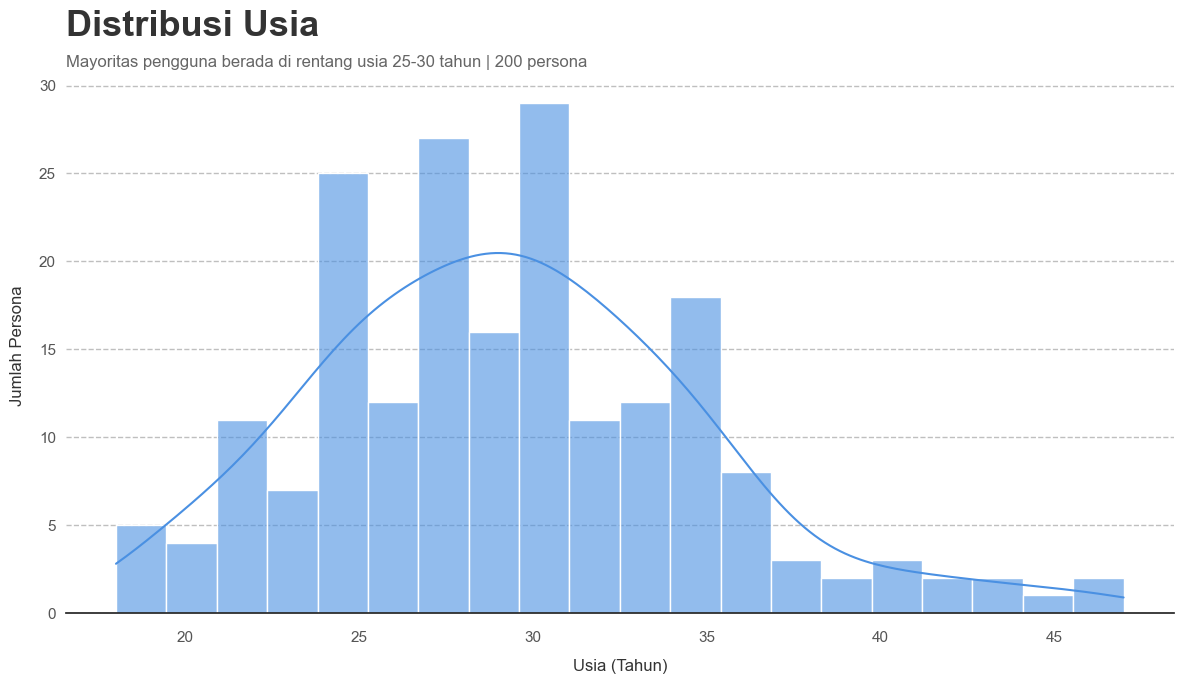

In [289]:
# 1. Setup Gaya Dasar (Putih bersih tanpa grid default yang mengganggu)
sns.set_style("white")

# 2. Buat Canvas
plt.figure(figsize=(12, 7))

# 3. Plotting (Gunakan warna yang lebih "matang", misal: #4A90E2)
ax = sns.histplot(data= df_master, 
                  x= 'age', 
                  kde= True, 
                  color= '#4A90E2', 
                  alpha= 0.6,
                  bins= 20)

# 4. Judul & Sub-judul (Rata Kiri & Besar)
# x=-0.05 menggeser sedikit ke kiri agar sejajar dengan angka sumbu Y
# y=1.1 memberi jarak ke atas agar tidak menempel grafik
plt.title("Distribusi Usia", 
          loc='left', 
          fontsize=26, 
          fontweight='bold', 
          pad=30, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s="Mayoritas pengguna berada di rentang usia 25-30 tahun | 200 persona", 
         fontsize=12, 
         color='#666666')

# 5. Membersihkan Border (Spines)
sns.despine(left=True) # Hapus garis kiri (karena sudah ada grid nanti)

# 6. Gridline Horizontal (Bantu baca, tapi jangan dominan)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
ax.set_axisbelow(True) # Pastikan grid ada DI BELAKANG batang

# 7. Penyesuaian Label Sumbu
plt.xlabel("Usia (Tahun)", fontsize=12, color='#333333', labelpad=10)
plt.ylabel("Jumlah Persona", fontsize=12, color='#333333', labelpad=10)

# 8. Mempercantik Ticks (Angka di sumbu)
plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

# Hilangkan "tick marks" kecil di sumbu Y agar lebih bersih
ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

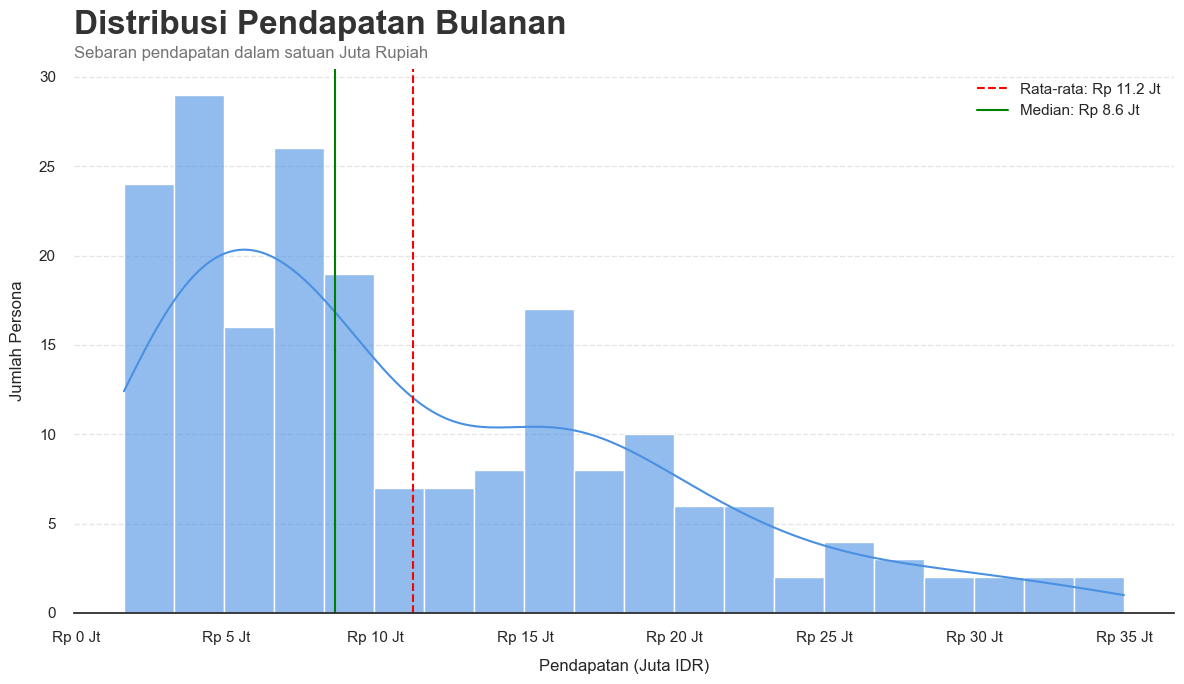

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformasi Data: Buat kolom baru dalam satuan Juta
# Membagi nilai asli dengan 1 juta
df_personas_cpy = df_master.copy()
df_personas_cpy['income_juta'] = df_personas['monthly_income'] / 1_000_000 

# 2. Setup Canvas
sns.set_style("white")
plt.figure(figsize=(12, 7))

# 3. Plotting menggunakan kolom BARU ('income_juta')
ax = sns.histplot(df_personas_cpy, 
                  x='income_juta', 
                  kde=True, 
                  color='#4A90E2', 
                  alpha=0.6,
                  bins=20)

# --- VISUALISASI PROFESIONAL ---

# Judul & Subtitle
plt.title("Distribusi Pendapatan Bulanan", 
          loc='left', 
          fontsize=24, 
          fontweight='bold', 
          pad=25, 
          color='#333333'
)

plt.text(x=ax.get_xlim()[0],
         y=ax.get_ylim()[1]*1.02, 
         s="Sebaran pendapatan dalam satuan Juta Rupiah", 
         fontsize=12, 
         color="#747474"
)

# Membersihkan Border
sns.despine(left=True)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# 4. Mempercantik Label Sumbu X
# Tambahkan sufiks "Juta" agar jelas
plt.xlabel("Pendapatan (Juta IDR)", fontsize=12, labelpad=10)
plt.ylabel("Jumlah Persona", fontsize=12, labelpad=10)

# Menambahkan 'Rp' dan 'Jt' pada angka sumbu X secara otomatis
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('Rp %.0f Jt'))

# Hitung Rata-rata dan Median dari data yang SUDAH dibagi 1 juta
mean_val = df_personas_cpy['income_juta'].mean()
median_val = df_personas_cpy['income_juta'].median()

# Gambar Garis Vertikal (Mean = Merah, Median = Hijau)
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Rata-rata: Rp {mean_val:.1f} Jt')
plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: Rp {median_val:.1f} Jt')

# Tampilkan Legenda
plt.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

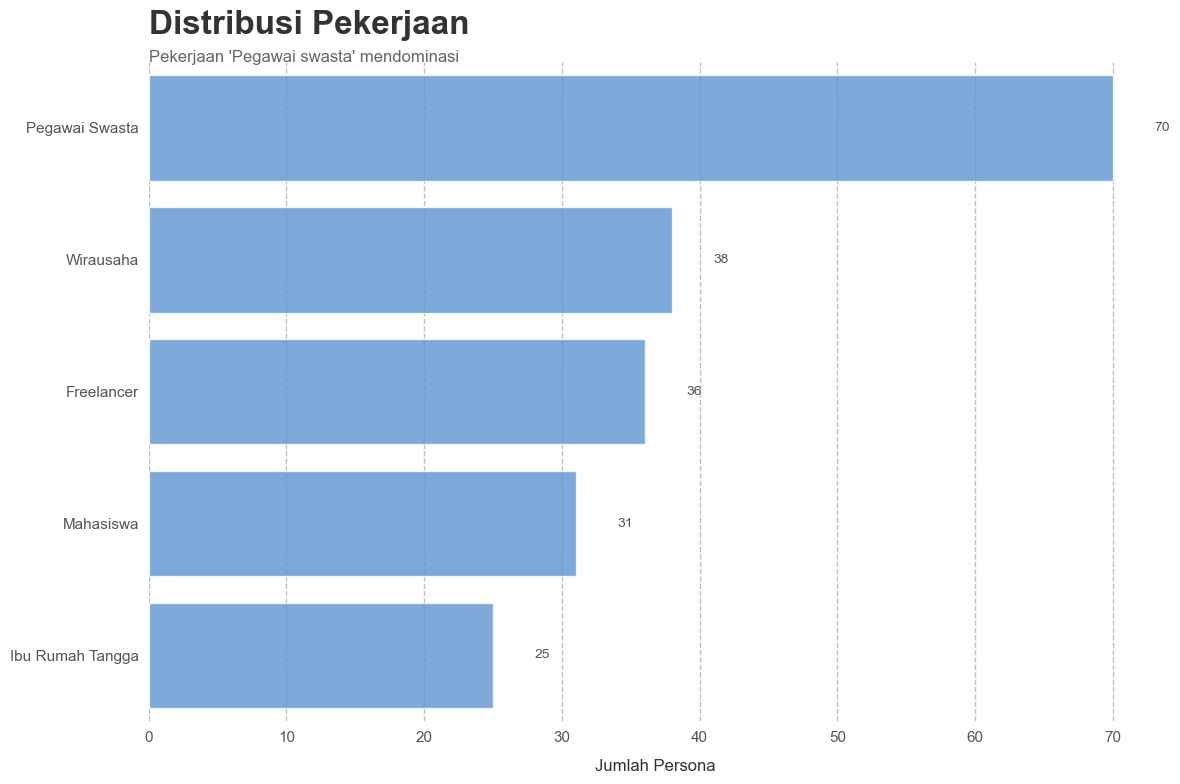

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup Gaya Dasar
sns.set_style("white")

# 2. Buat Canvas (Sedikit lebih tinggi agar muat semua kategori job)
plt.figure(figsize=(12, 8))

# 3. TENTUKAN URUTAN (Sorting)
# Grafik profesional WAJIB diurutkan agar mata mudah membandingkan
job_order = df_master['job'].value_counts().index

# 4. Plotting (Gunakan y='job' agar menjadi HORIZONTAL)
# Menggunakan palet satu warna (bukan warna-warni pelangi) agar fokus ke data
ax = sns.countplot(data=df_master, 
                   y='job', 
                   order=job_order, 
                   color='#4A90E2', 
                   alpha=0.8
)

# 5. Judul & Sub-judul
# Perhatikan x=-0.5 (perlu disesuaikan tergantung panjang label job) untuk alignment
plt.title("Distribusi Pekerjaan", 
          loc='left', 
          fontsize=24, 
          fontweight='bold', 
          pad=20, 
          color='#333333'
)

plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1,
         s="Pekerjaan 'Pegawai swasta' mendominasi",
         fontsize=12, 
         color='#666666'
)

# 6. Membersihkan Border
sns.despine(left=True, bottom=True) # Hilangkan garis kiri dan bawah

# 7. Gridline Vertikal (Karena grafiknya horizontal)
ax.xaxis.grid(True, linestyle='--', alpha=0.5, color='grey')
ax.set_axisbelow(True)

# 8. Penyesuaian Label Sumbu
plt.ylabel("", fontsize=12) # Kosongkan label Y karena nama job sudah jelas
plt.xlabel("Jumlah Persona", fontsize=12, color='#333333', labelpad=10)

# 9. Mempercantik Ticks
plt.xticks(fontsize=11, color='#555555', )
plt.yticks(fontsize=11, color='#555555')

# Hilangkan tick marks
ax.tick_params(axis='both', length=0)

# Opsional: Menambahkan Angka di Ujung Batang (Data Labels)
# Ini sangat disukai di laporan bisnis agar pembaca tidak perlu menebak angka
for container in ax.containers:
    ax.bar_label(container, padding=30, fontsize=10, color='#555555')

plt.tight_layout()
plt.show()

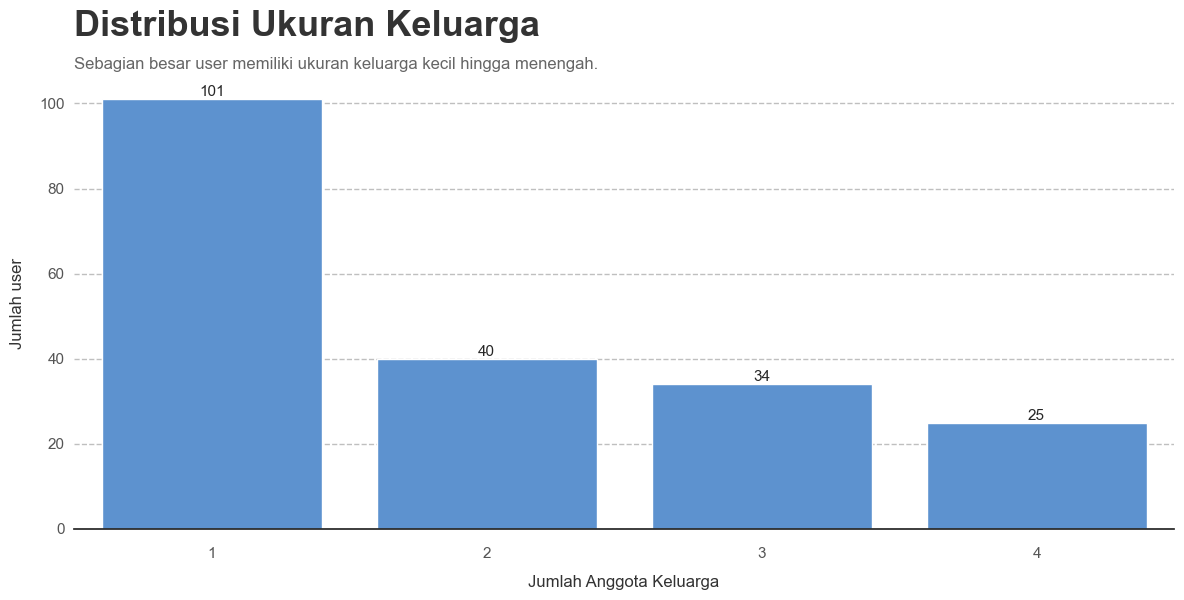

In [292]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(
    x="household_size",
    data=df_master,
    color= '#4A90E2',
    ax=ax
)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Ukuran Keluarga", 
          loc='left', 
          fontsize=26, 
          fontweight='bold', 
          pad=30, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s="Sebagian besar user memiliki ukuran keluarga kecil hingga menengah.", 
         fontsize=12,
         color='#666666')
# Membersihkan Border 
sns.despine(left=True) # Hapus garis kiri (karena sudah ada grid nanti)

# Gridline Horizontal (Bantu baca, tapi jangan dominan)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
ax.set_axisbelow(True) # Pastikan grid ada DI BELAKANG batang

plt.xlabel("Jumlah Anggota Keluarga", 
           fontsize=12, 
           color='#333333', 
           labelpad=10)

plt.ylabel("Jumlah user", 
           fontsize=12, 
           color='#333333', 
           labelpad=10)

plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

ax.tick_params(axis='y', length=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=11)


plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


### Analisis Univariant Transacation 

In [293]:
def currency_formatter(x, pos):
    if x >= 1000000:
        return f'Rp {x*1e-6:.1f} Jt'
    elif x >= 1000:
        return f'Rp {x*1e-3:.0f} Rb'
    else:
        return f'Rp {x:.0f}'

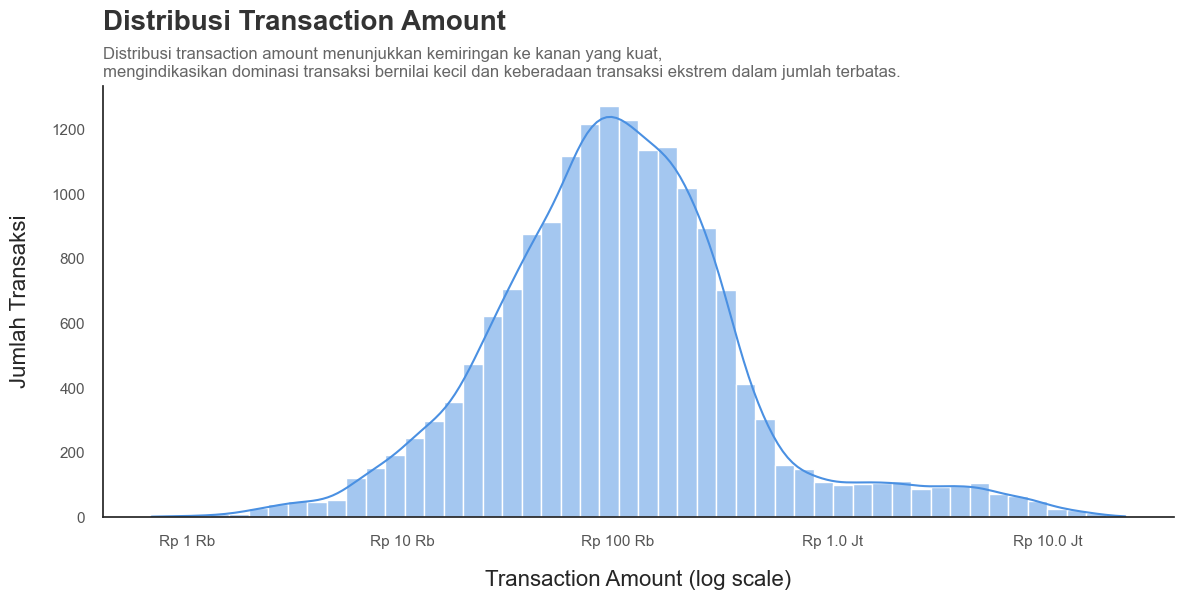

In [294]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,7))

sns.histplot(
    df_transactions["amount"],
    bins=50,
    kde=True,
    log_scale=True,
    color="#4A90E2",
    ax=ax
)

# Membersihkan Border 
#sns.despine(left=True) # Hapus garis kiri (karena sudah ada grid nanti)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Transaction Amount", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=40, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s="Distribusi transaction amount menunjukkan kemiringan ke kanan yang kuat, \n" \
         "mengindikasikan dominasi transaksi bernilai kecil dan keberadaan transaksi ekstrem dalam jumlah terbatas.", 
         fontsize=12,
         color='#666666')

# Gridline Horizontal (Bantu baca, tapi jangan dominan)
ax.grid(axis='y', linestyle='--', alpha=0.5, color='grey')
ax.set_axisbelow(True) # Pastikan grid ada DI BELAKANG batang

plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

ax.set_xlabel("Transaction Amount (log scale)", labelpad=15, fontsize= 16)
ax.set_ylabel("Jumlah Transaksi", labelpad=15, fontsize= 16)
ax.grid(False)
ax.spines[['top','right']].set_visible(False)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


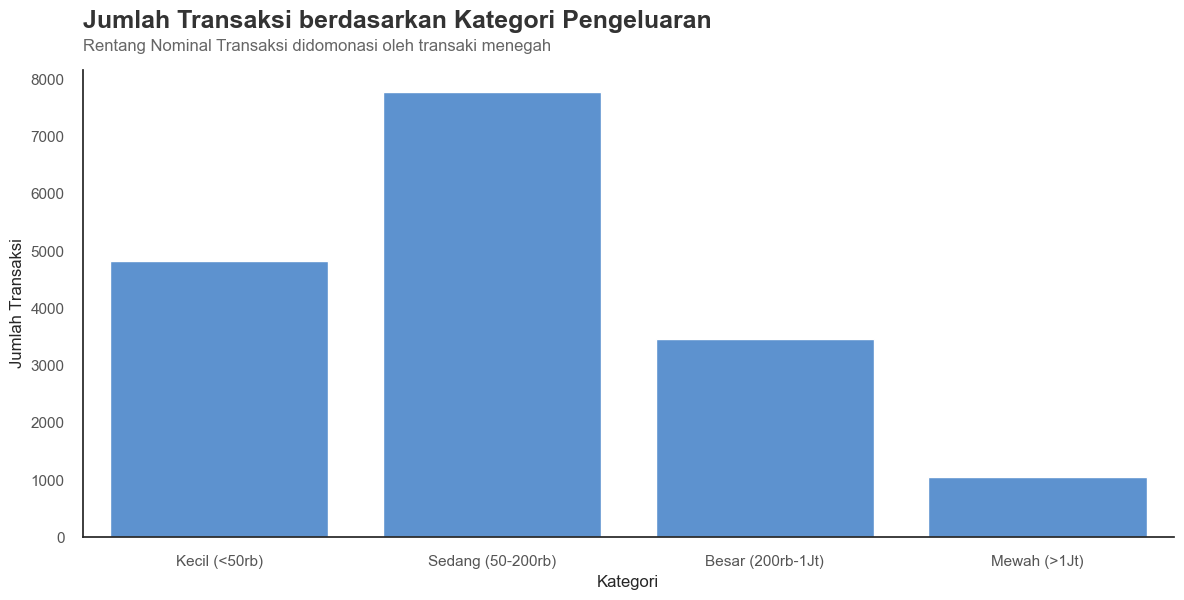

In [295]:
# --- PLOT 3: Segmentasi (Binning) untuk Bisnis Insight ---
# Kita buat kategori belanja
fig, ax = plt.subplots(figsize=(12,7))

bins = [0, 50000, 200000, 1000000, float('inf')]
labels = ['Kecil (<50rb)', 'Sedang (50-200rb)', 'Besar (200rb-1Jt)', 'Mewah (>1Jt)']
df_transactions['spending_category'] = pd.cut(df_transactions['amount'], bins=bins, labels=labels)

sns.countplot(x='spending_category', 
              data=df_transactions, 
              color= '#4A90E2', 
              ax=ax)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Jumlah Transaksi berdasarkan Kategori Pengeluaran", 
          loc='left', 
          fontsize=18, 
          fontweight='bold', 
          pad=30, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.04, 
         s="Rentang Nominal Transaksi didomonasi oleh transaki menegah", 
         fontsize=12,
         color='#666666')


plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

ax.spines[['top','right']].set_visible(False)


ax.set_xlabel('Kategori')
ax.set_ylabel('Jumlah Transaksi')

plt.tight_layout(rect=[0,0,1,0.88])
plt.show()

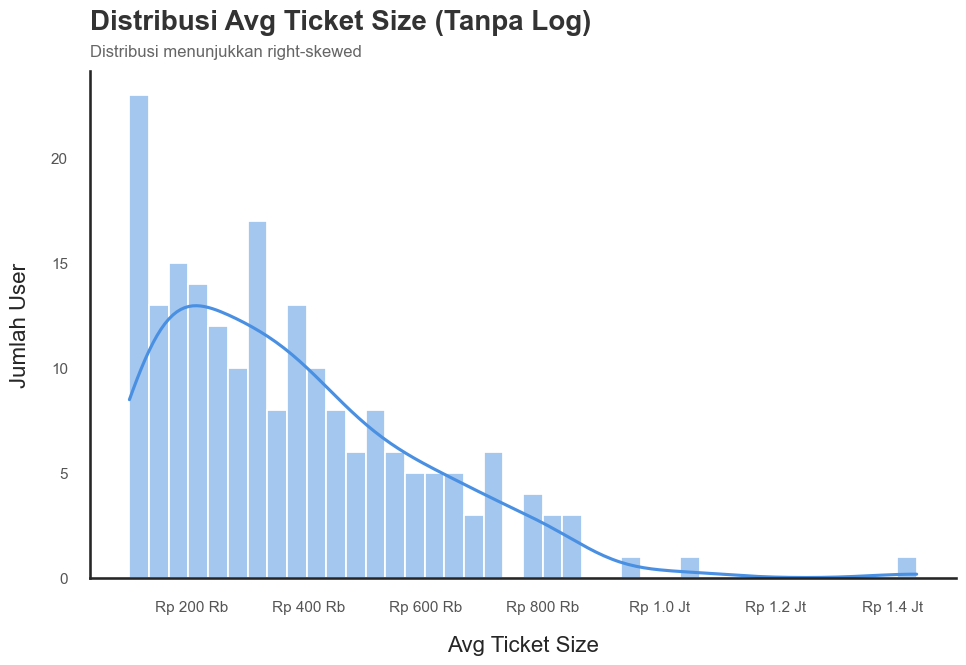

In [296]:
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(
    df_master["avg_ticket_size"],
    bins=40,
    kde=True,
    color="#4A90E2",
    ax=ax
)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Avg Ticket Size (Tanpa Log)", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=30, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.03, 
         s="Distribusi menunjukkan right-skewed", 
         fontsize=12,
         color='#666666')


plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')

ax.set_xlabel("Avg Ticket Size", labelpad=15, fontsize= 16)
ax.set_ylabel("Jumlah User", labelpad=15, fontsize= 16)
ax.grid(False)
ax.spines[['top','right']].set_visible(False)


ax.spines[['top','right']].set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
plt.tight_layout()
plt.show()


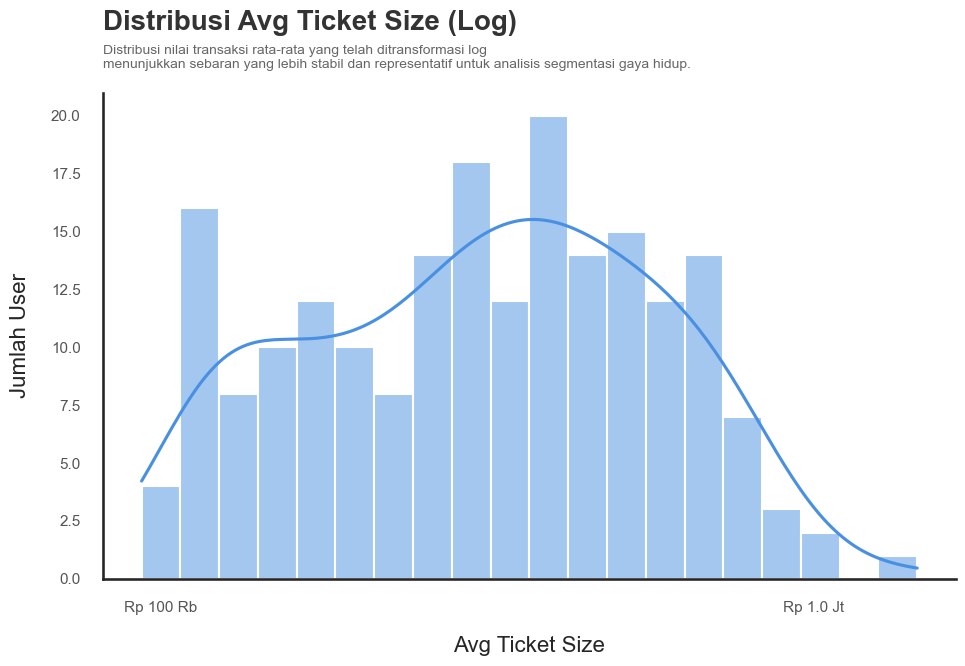

In [297]:
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(
    df_master["avg_ticket_size"],
    bins=20,
    kde=True,
    log_scale=True,
    color="#4A90E2",
    ax=ax
)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Avg Ticket Size (Log)", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=45, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.05, 
         s='Distribusi nilai transaksi rata-rata yang telah ditransformasi log\n' \
         'menunjukkan sebaran yang lebih stabil dan representatif untuk analisis segmentasi gaya hidup.', 
         fontsize=10,
         color='#666666')

plt.xticks(fontsize=11, color='#555555')
plt.yticks(fontsize=11, color='#555555')


ax.set_xlabel("Avg Ticket Size", labelpad=15, fontsize= 16)
ax.set_ylabel("Jumlah User", labelpad=15, fontsize= 16)
ax.grid(False)
ax.spines[['top','right']].set_visible(False)


ax.spines[['top','right']].set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
plt.tight_layout()
plt.show()

Distribusi rata-rata nilai transaksi menunjukkan kemiringan ekstrem pada skala asli, sehingga dilakukan transformasi log sebelum scaling untuk menstabilkan sebaran dan memastikan jarak antar pengguna lebih representatif dalam proses clustering.

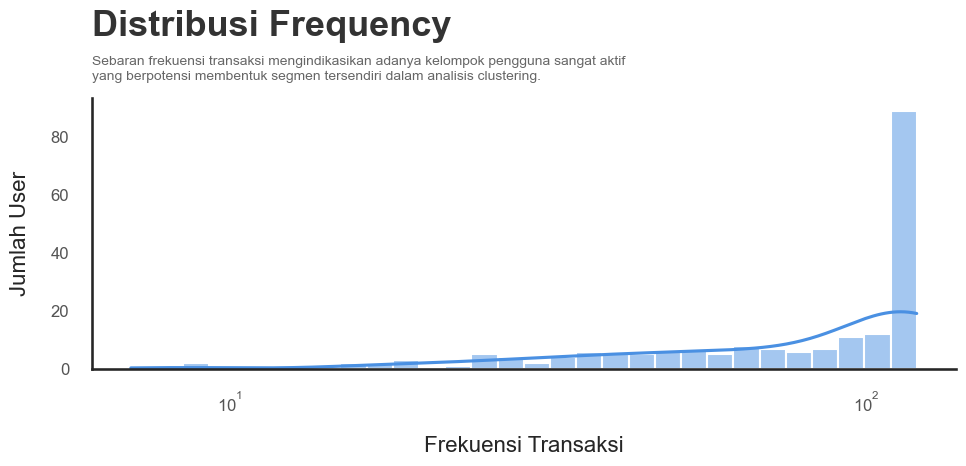

In [298]:
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(
    df_master["frequency"],
    bins=30,
    log_scale=True,
    kde=True,
    color="#4A90E2",
    ax=ax
)

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Frequency", 
          loc='left', 
          fontsize=26, 
          fontweight='bold', 
          pad=45, 
          color='#333333')

plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.07, 
         s='Sebaran frekuensi transaksi mengindikasikan adanya kelompok pengguna sangat aktif\n' \
         'yang berpotensi membentuk segmen tersendiri dalam analisis clustering.', 
         fontsize=10,
         color='#666666')


plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

ax.set_xlabel("Frekuensi Transaksi", labelpad=15, fontsize= 16)
ax.set_ylabel("Jumlah User", labelpad=15, fontsize= 16)
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()


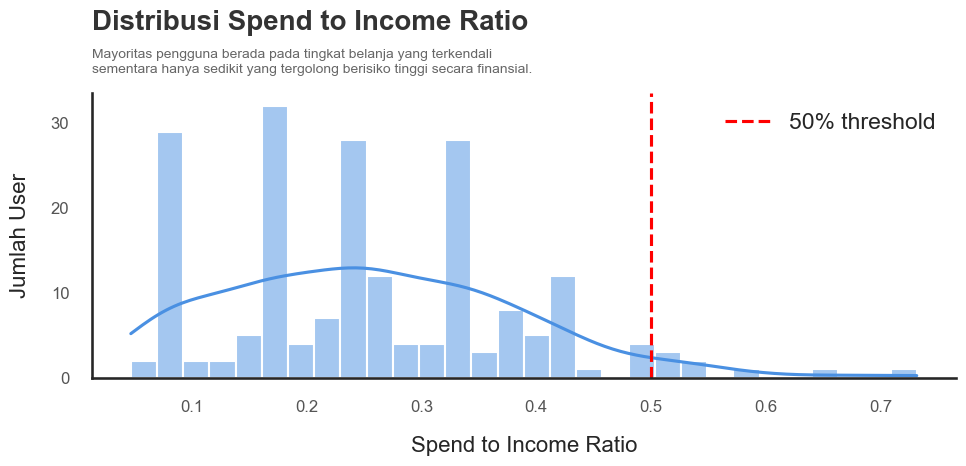

In [299]:


sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(
    df_master["spend_to_income_ratio"],
    bins=30,
    kde=True,
    color="#4A90E2",
    ax=ax
)

ax.axvline(0.5, linestyle="--", color="red", label="50% threshold")
ax.legend()

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Spend to Income Ratio", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=45, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.07, 
         s='Mayoritas pengguna berada pada tingkat belanja yang terkendali\n' \
         'sementara hanya sedikit yang tergolong berisiko tinggi secara finansial.', 
         fontsize=10,
         color='#666666')


plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

ax.set_xlabel("Spend to Income Ratio", labelpad=15, fontsize= 16)
ax.set_ylabel("Jumlah User", labelpad=15, fontsize= 16)
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()


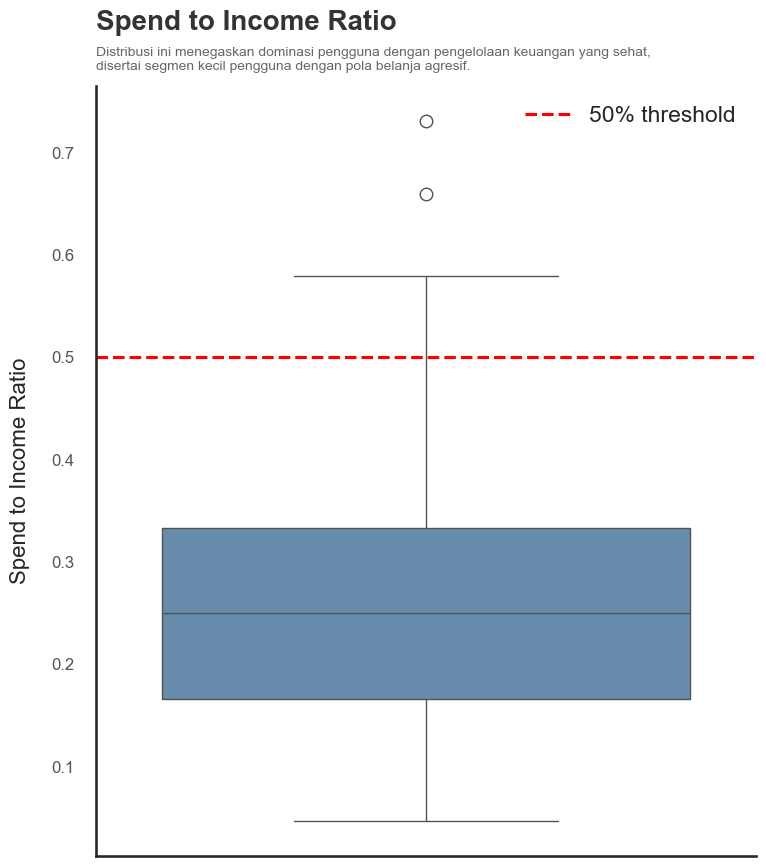

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,9))

sns.boxplot(
    y=df_master["spend_to_income_ratio"],
    color="#5B8DB8",
    ax=ax
)

ax.axhline(0.5, linestyle="--", color="red", label="50% threshold")
ax.legend()

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Spend to Income Ratio", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=40, 
          color='#333333')

plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s='Distribusi ini menegaskan dominasi pengguna dengan pengelolaan keuangan yang sehat,\n' \
         'disertai segmen kecil pengguna dengan pola belanja agresif.', 
         fontsize=10,
         color='#666666')


ax.set_xlabel("")
ax.set_ylabel("Spend to Income Ratio", labelpad=15, fontsize= 16)
ax.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()


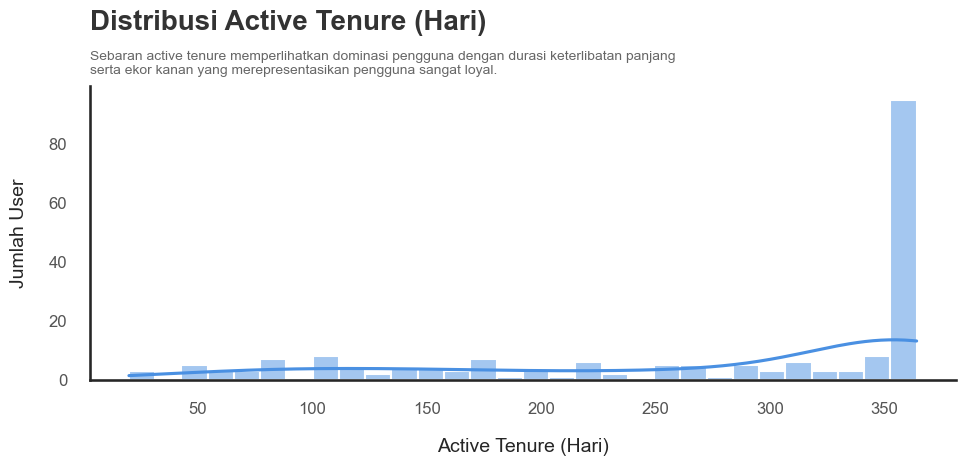

In [301]:
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(
    df_master["active_tenure_days"],
    bins=30,
    kde=True,
    color="#4A90E2",
    ax=ax
)

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Judul & Sub-judul (Rata Kiri & Besar)
plt.title("Distribusi Active Tenure (Hari)", 
          loc='left', 
          fontsize=20, 
          fontweight='bold', 
          pad=40, 
          color='#333333')

plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.04, 
         s='Sebaran active tenure memperlihatkan dominasi pengguna dengan durasi keterlibatan panjang\n' \
         'serta ekor kanan yang merepresentasikan pengguna sangat loyal.', 
         fontsize=10,
         color='#666666')


ax.set_xlabel("Active Tenure (Hari)", fontsize = 14, labelpad=15)
ax.set_ylabel("Jumlah User", labelpad=15, fontsize= 14)
ax.spines[['top','right']].set_visible(False)


plt.tight_layout()
plt.show()


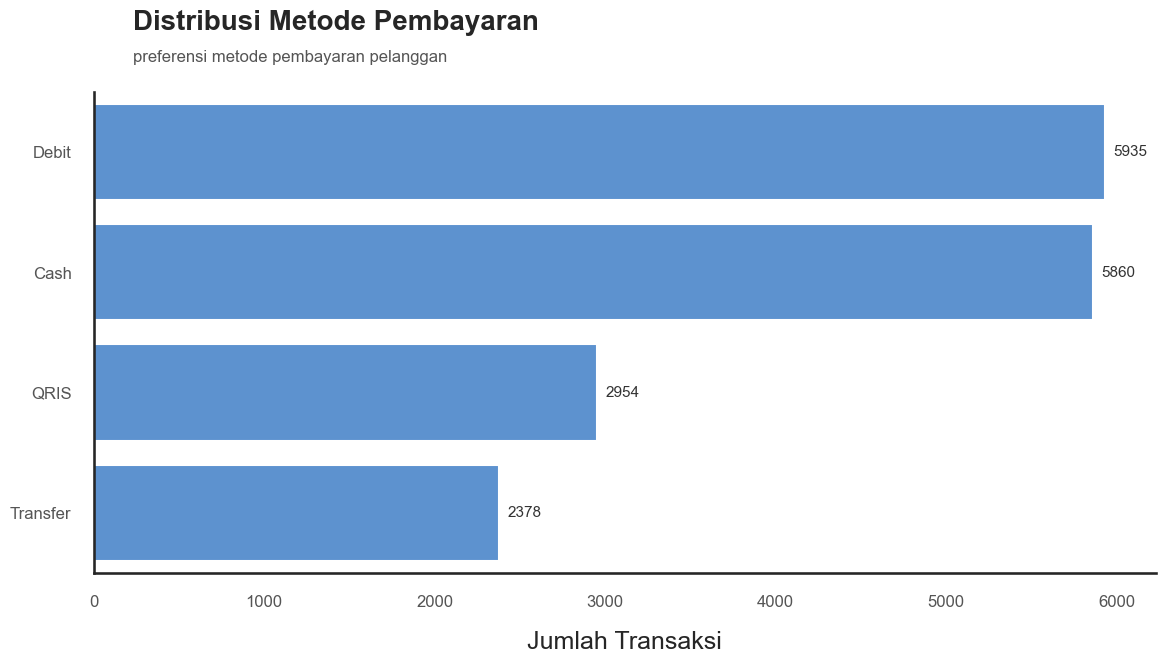

In [302]:
# Consistent professional style
sns.set_theme(style="white", context="talk")

# Sort data once
payment_order = df_transactions['payment_method'].value_counts().index

fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(
    y="payment_method",
    data=df_transactions,
    order=payment_order,
    color= '#4A90E2',
    ax=ax
)

# Remove clutter
ax.grid(False)
ax.spines[['top', 'right']].set_visible(False)

# Axis formatting
ax.set_xlabel("Jumlah Transaksi", fontsize=18, labelpad=15)
ax.set_ylabel("", fontsize=12)

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# --- Left aligned title & subtitle ---
fig.text(
    0.125, 0.93,
    "Distribusi Metode Pembayaran",
    fontsize=20,
    fontweight="bold",
    ha="left"
)

fig.text(
    0.125, 0.885,
    "preferensi metode pembayaran pelanggan",
    fontsize=12,
    color="#555555",
    ha="left"
)

# Tambahkan label angka di ujung bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',
        padding=6,
        fontsize=11,
        color="#333333"
    )

plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()


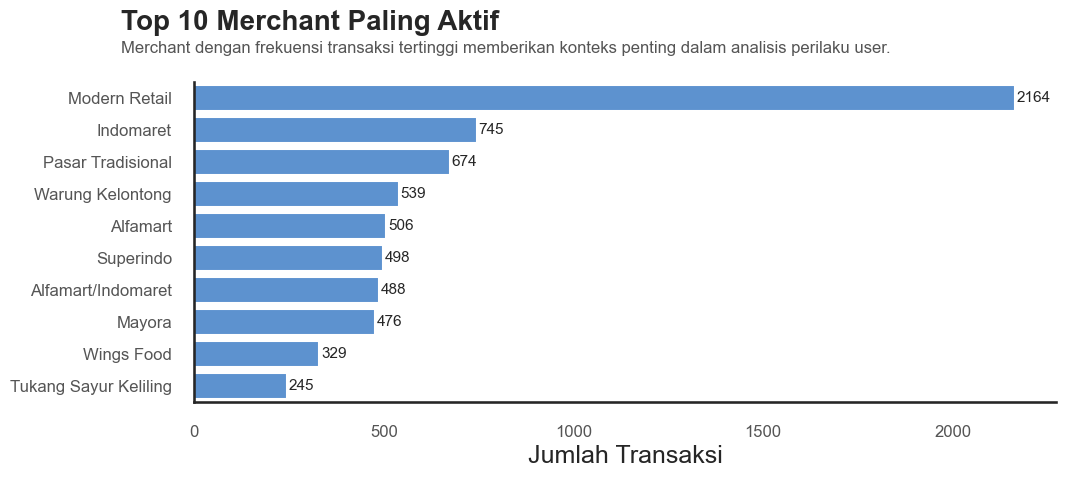

In [303]:
top_merchant = df_transactions["merchant"].value_counts().head(10)

fig, ax = plt.subplots(figsize=(11,5))

sns.barplot(
    x=top_merchant.values,
    y=top_merchant.index,
    color="#4A90E2",
    ax=ax
)

for i, v in enumerate(top_merchant.values):
    ax.text(v + 5, i, v, va='center', fontsize=11)

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')



ax.set_xlabel("Jumlah Transaksi")
ax.set_ylabel("")
ax.grid(False)
ax.spines[['top','right',]].set_visible(False)

fig.text(0.125, 0.93, "Top 10 Merchant Paling Aktif", fontsize=20, fontweight="bold")
fig.text(
    0.125, 0.885,
    "Merchant dengan frekuensi transaksi tertinggi memberikan konteks penting dalam analisis perilaku user.",
    fontsize=12,
    color="#555555"
)

plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


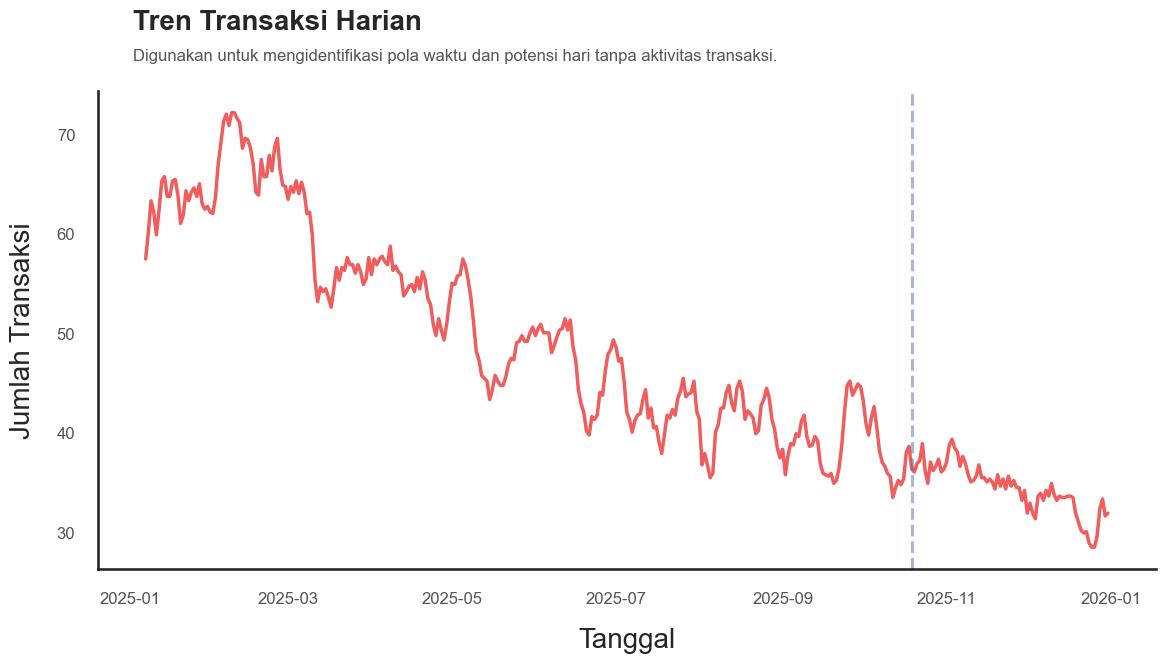

In [304]:
daily_tx = (
    df_transactions
    .groupby(df_transactions["date"].dt.date)
    .size()
)
daily_tx_rolling = daily_tx.rolling(7).mean()
min_day = daily_tx.idxmin()

fig, ax = plt.subplots(figsize=(12,7))


plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')


ax.plot(daily_tx.index, daily_tx_rolling, linewidth=2.5, color="#F15C5C")

#ax.plot(daily_tx.index, daily_tx.values, color="#1F3A5F")

ax.axvline(min_day, linestyle="--", alpha=0.5)

ax.set_xlabel("Tanggal", labelpad=15, fontsize = 20)
ax.set_ylabel("Jumlah Transaksi", labelpad=15, fontsize = 20)
ax.grid(False)
ax.spines[['top','right']].set_visible(False)

fig.text(0.125, 0.93, "Tren Transaksi Harian", fontsize=20, fontweight="bold")
fig.text(
    0.125, 0.885,
    "Digunakan untuk mengidentifikasi pola waktu dan potensi hari tanpa aktivitas transaksi.",
    fontsize=12,
    color="#555555"
)

plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


#### vusialisi dataset Product


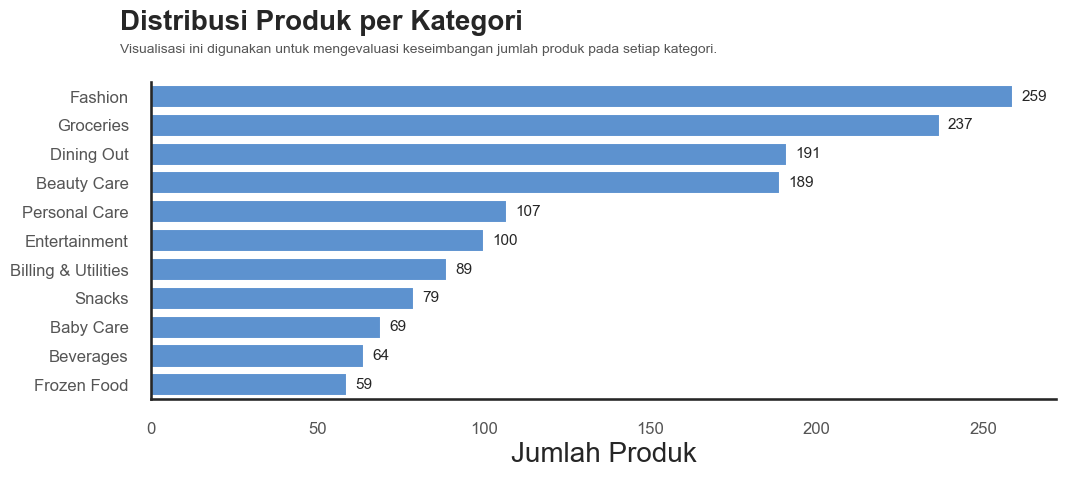

In [305]:
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(11,5))

order = df_products["category"].value_counts().index

sns.countplot(
    y="category",
    data=df_products,
    order=order,
    color="#4A90E2",
    ax=ax
)

# Value labels
for container in ax.containers:
    ax.bar_label(container, padding=6, fontsize=11)

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')


ax.set_xlabel("Jumlah Produk", fontsize=20)
ax.set_ylabel("")
ax.grid(False)
ax.spines[['top','right']].set_visible(False)

fig.text(0.125, 0.93, "Distribusi Produk per Kategori", fontsize=20, fontweight="bold")
fig.text(
    0.125, 0.885,
    "Visualisasi ini digunakan untuk mengevaluasi keseimbangan jumlah produk pada setiap kategori.",
    fontsize=10,
    color="#555555"
)

plt.tight_layout(rect=[0,0,1,0.88])
plt.show()


#### Analisis BIvariant

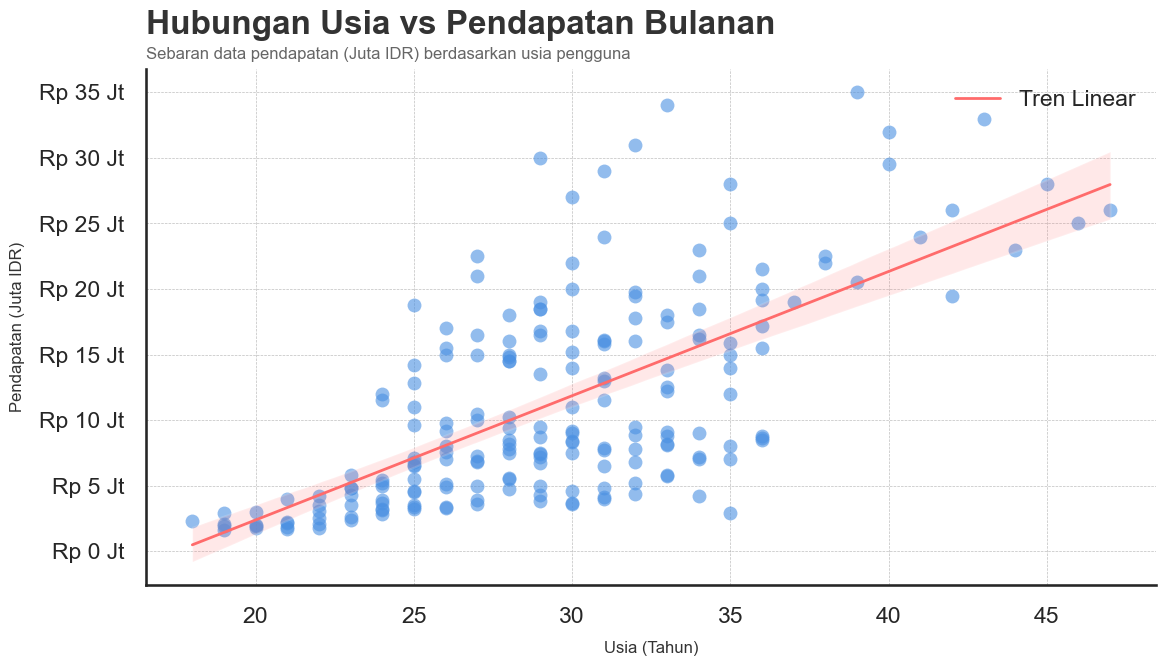

In [306]:
df_personas['income_juta'] = df_personas['monthly_income'] / 1_000_000 

# 2. Setup Style
sns.set_style("white")
plt.figure(figsize=(12, 7))

# 3. Plotting: Scatter Plot dengan Garis Regresi (Regplot)
# scatter_kws={'s': 80, 'alpha': 0.6}: Mengatur ukuran titik (s) dan transparansi (alpha)
# line_kws={'color': 'red', 'alpha': 0.5}: Mengatur warna garis tren
ax = sns.regplot(data=df_personas, x='age', y='income_juta', 
                 color='#4A90E2', 
                 scatter_kws={'s': 100, 'alpha': 0.6, 'edgecolor': 'white'},
                 line_kws={'color': '#FF6B6B', 'linewidth': 2, 'label': 'Tren Linear'})

# --- VISUALISASI PROFESIONAL ---

# 4. Judul & Subtitle
plt.title("Hubungan Usia vs Pendapatan Bulanan", 
          loc='left', fontsize=24, fontweight='bold', pad=25, color='#333333')

# Insight/Subtitle (Sesuaikan dengan temuan Anda nanti)
# Misal: "Tidak terlihat korelasi kuat antara bertambahnya usia dengan kenaikan pendapatan"
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s="Sebaran data pendapatan (Juta IDR) berdasarkan usia pengguna", 
         fontsize=12, color='#666666')

# 5. Membersihkan Border
sns.despine(top=True, right=True)

# 6. Gridline (Penting untuk Scatter Plot agar mudah melacak koordinat X-Y)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True) # Grid di belakang titik

# 7. Labels
plt.xlabel("Usia (Tahun)", fontsize=12, labelpad=10, color='#333333')
plt.ylabel("Pendapatan (Juta IDR)", fontsize=12, labelpad=10, color='#333333')

# 8. Formatting Sumbu Y (Format "Rp X Jt")
ax.yaxis.set_major_formatter(FormatStrFormatter('Rp %.0f Jt'))

# Menambahkan Legend (Untuk garis tren)
plt.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

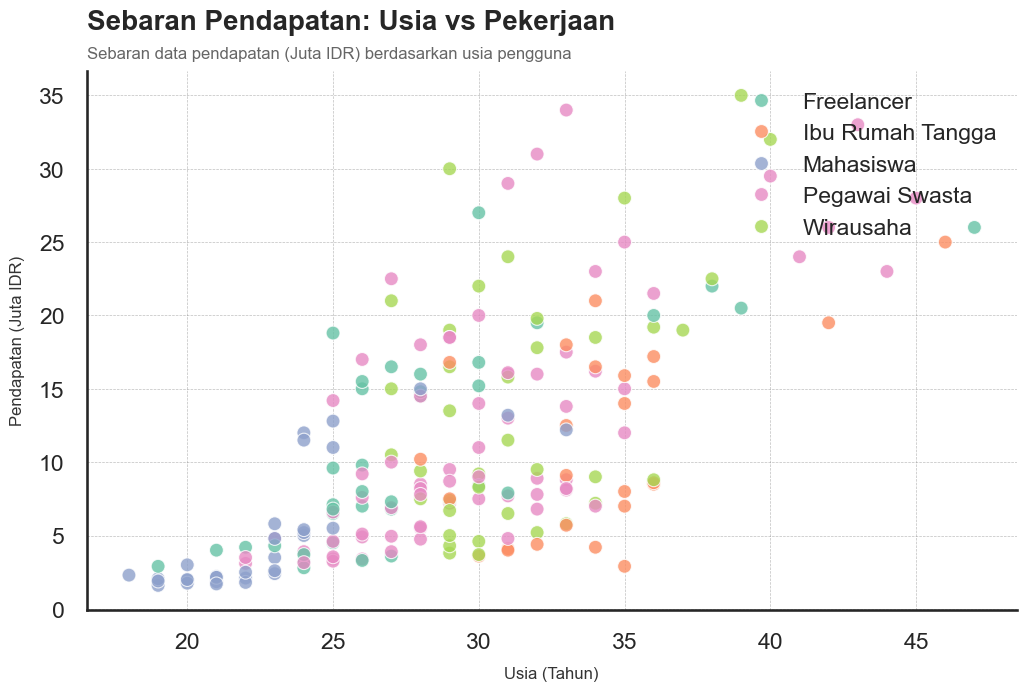

In [307]:
df_personas['income_juta'] = df_personas['monthly_income'] / 1_000_000 
plt.figure(figsize=(12, 7))

# Menambahkan hue='job' untuk melihat apakah pekerjaan tertentu mengelompok
sns.scatterplot(data=df_personas, x='age', y='income_juta', 
                hue='job',           # <--- Pembeda warna
                palette='Set2',      # Warna yang berbeda-beda
                s=100, alpha=0.8)

plt.title("Sebaran Pendapatan: Usia vs Pekerjaan", 
          loc='left', 
          fontsize=20,
          pad=30,
          fontweight='bold')

# Insight/Subtitle (Sesuaikan dengan temuan Anda nanti)
# Misal: "Tidak terlihat korelasi kuat antara bertambahnya usia dengan kenaikan pendapatan"
plt.text(x=ax.get_xlim()[0], 
         y=ax.get_ylim()[1] * 1.02, 
         s="Sebaran data pendapatan (Juta IDR) berdasarkan usia pengguna", 
         fontsize=12, color='#666666')

# 5. Membersihkan Border
sns.despine(top=True, right=True)

# 6. Gridline (Penting untuk Scatter Plot agar mudah melacak koordinat X-Y)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True) # Grid di belakang titik

# 7. Labels
plt.xlabel("Usia (Tahun)", fontsize=12, labelpad=10, color='#333333')
plt.ylabel("Pendapatan (Juta IDR)", fontsize=12, labelpad=10, color='#333333')

# 8. Formatting Sumbu Y (Format "Rp X Jt")
ax.yaxis.set_major_formatter(FormatStrFormatter('Rp %.0f Jt'))

# Menambahkan Legend (Untuk garis tren)
plt.legend(loc='upper right', frameon=False)
plt.show()

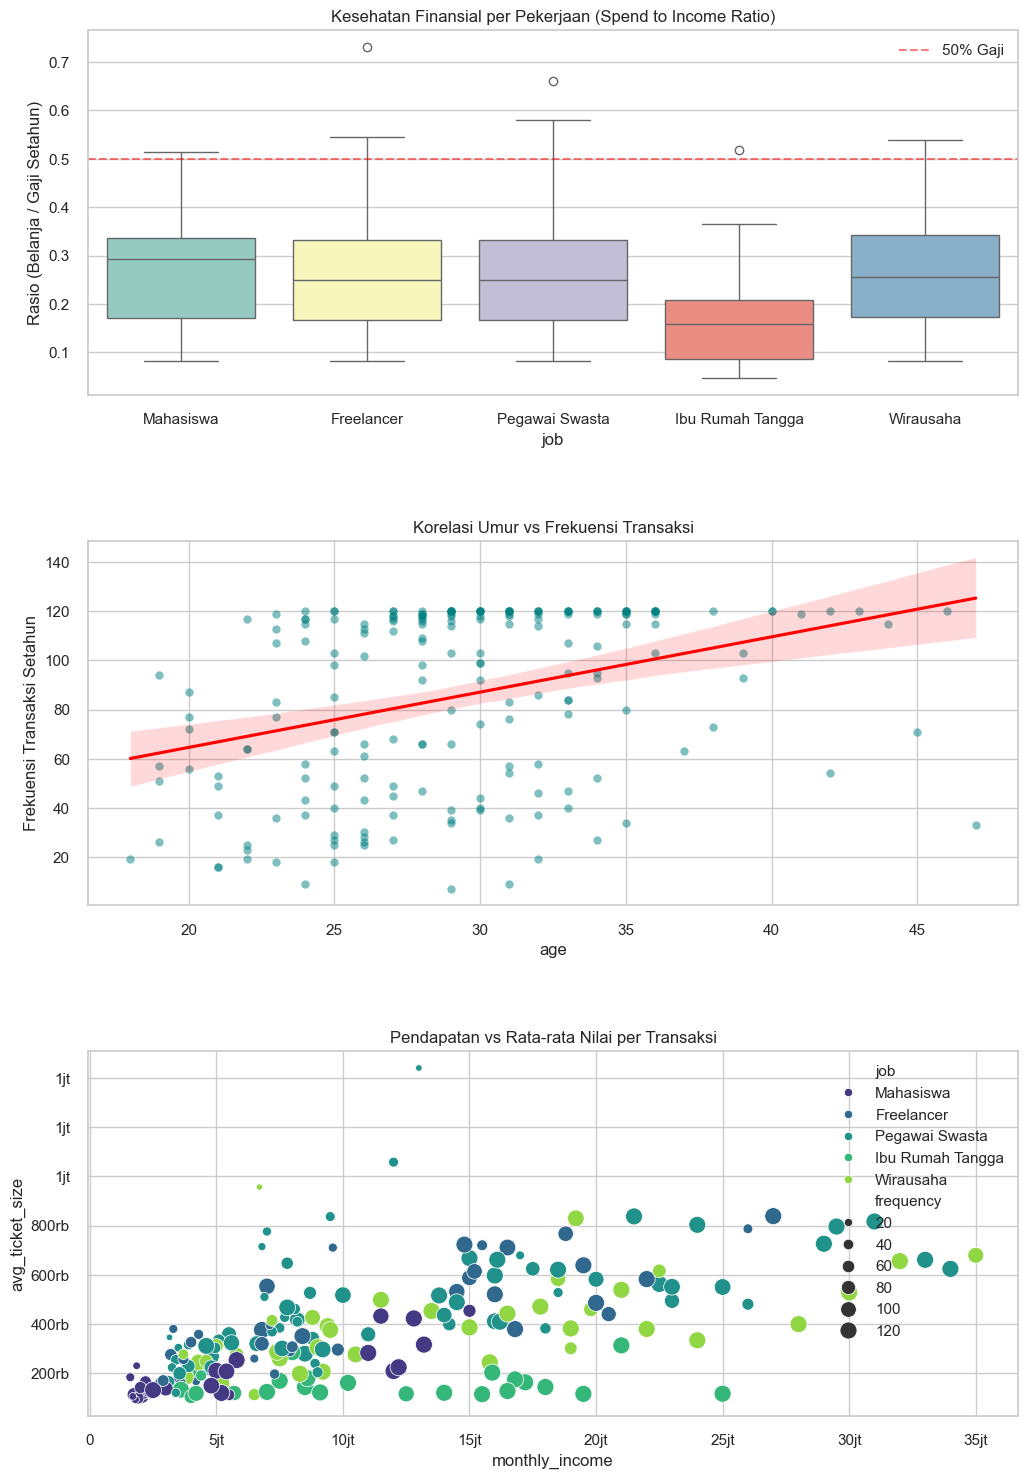

In [308]:
# Setup Visual
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
plt.subplots_adjust(hspace=0.4)

# Formatter Rupiah
def currency_fmt(x, pos):
    if x >= 1e6: return f'{x*1e-6:.0f}jt'
    elif x >= 1e3: return f'{x*1e-3:.0f}rb'
    return f'{x:.0f}'

# --- VISUALISASI 1: JOB vs SPENDING RATIO (Siapa yang paling "Ngepas"?) ---
# Kita ingin melihat profesi mana yang rasionya paling tinggi (Boros/Beban hidup tinggi)
sns.boxplot(data=df_master, x='job', y='spend_to_income_ratio', ax=axes[0], palette='Set3')
axes[0].set_title('Kesehatan Finansial per Pekerjaan (Spend to Income Ratio)')
axes[0].set_ylabel('Rasio (Belanja / Gaji Setahun)')
axes[0].axhline(0.5, color='red', linestyle='--', alpha=0.5, label='50% Gaji')
axes[0].legend()

# --- VISUALISASI 2: AGE vs FREQUENCY (Siapa yang paling sering gesek?) ---
# Kita gunakan Scatterplot dengan regresi line untuk melihat tren
sns.regplot(data=df_master, x='age', y='frequency', ax=axes[1], 
            scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'red'})
axes[1].set_title('Korelasi Umur vs Frekuensi Transaksi')
axes[1].set_ylabel('Frekuensi Transaksi Setahun')

# --- VISUALISASI 3: INCOME vs AVG TICKET SIZE (Daya Beli Real) ---
# Apakah gaji besar otomatis sekali belanja langsung mahal?
sns.scatterplot(data=df_master, x='monthly_income', y='avg_ticket_size', 
                hue='job', size='frequency', sizes=(20, 150), ax=axes[2], palette='viridis')
axes[2].set_title('Pendapatan vs Rata-rata Nilai per Transaksi')
axes[2].xaxis.set_major_formatter(ticker.FuncFormatter(currency_fmt))
axes[2].yaxis.set_major_formatter(ticker.FuncFormatter(currency_fmt))

plt.show()



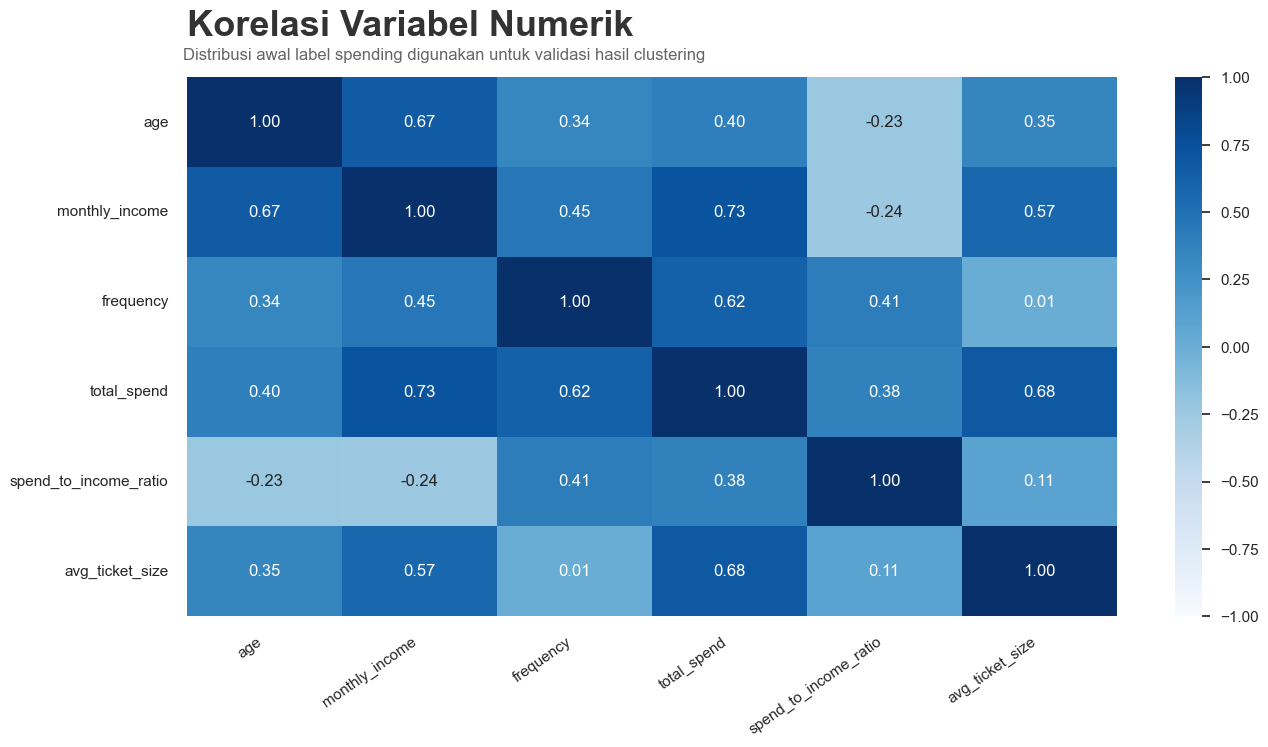

In [309]:
# --- VALIDASI STATISTIK (Correlation) ---
correlation = df_master[['age', 'monthly_income', 'frequency', 'total_spend', 'spend_to_income_ratio', 'avg_ticket_size']].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation,
               annot=True,
               cmap='Blues',
               fmt=".2f",
               vmin=-1,
               vmax=1)

plt.title('Korelasi Variabel Numerik', 
          loc='left', 
          fontsize=26, 
          fontweight='bold', 
          pad=30, 
          color='#333333')

# Menambahkan Sub-judul (Insight atau Keterangan Waktu)
plt.text(-0.025, -0.2,
         s="Distribusi awal label spending digunakan untuk validasi hasil clustering", 
         fontsize=12,
         color='#666666',
)


plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)

plt.show()

In [310]:
features_to_transform = ['total_spend', 'avg_ticket_size']
skewness_before = df_master[features_to_transform].skew()

In [311]:
print("=== SKEWNESS SEBELUM TRANSFORMASI ===")
print("Aturan: Nilai > 1.0 berarti 'Highly Skewed' (Wajib Log Transform)")
print(skewness_before)

=== SKEWNESS SEBELUM TRANSFORMASI ===
Aturan: Nilai > 1.0 berarti 'Highly Skewed' (Wajib Log Transform)
total_spend        1.003785
avg_ticket_size    1.163671
dtype: float64


In [312]:
# Apply Log Transform
for col in features_to_transform:
    df_master[f'log_{col}'] = np.log1p(df_master[col])

In [313]:
skewness_after = df_master[[f'log_{col}' for col in features_to_transform]].skew()
print("\n=== SKEWNESS SETELAH TRANSFORMASI ===")
print(skewness_after)


=== SKEWNESS SETELAH TRANSFORMASI ===
log_total_spend       -0.499317
log_avg_ticket_size   -0.088014
dtype: float64


In [314]:
# Cek Frequency skewness
freq_skew = df_master['frequency'].skew()
print(f"\nSkewness Frequency: {freq_skew:.2f}")


Skewness Frequency: -0.59


In [315]:
# Kolom usia
col_to_bin = "age"

# Nama kolom baru
new_col_name = "age_group"

# Label kategori usia
bin_labels = ["Remaja", "Dewasa", "Lansia"]

# Binning usia (quantile-based)
df_master[new_col_name] = pd.qcut(
    df_master[col_to_bin],
    q=3,
    labels=bin_labels,
    duplicates="drop"
)

# =========================================================
# 2. LABEL ENCODING (AGE GROUP)
# =========================================================

label_encoder = LabelEncoder()

df_master[new_col_name] = label_encoder.fit_transform(df_master[new_col_name])

joblib.dump(label_encoder, '../models/label_encoder_age.pkl')

age_group_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Age Group Encoding:", age_group_mapping)


Age Group Encoding: {'Dewasa': 0, 'Lansia': 1, 'Remaja': 2}


In [316]:
import joblib
features_all = [
    "age_group",
    "monthly_income",
    "log_avg_ticket_size",
    "frequency",
    "total_spend",
    "spend_to_income_ratio",
    "active_tenure_days"
]
# 1. Inisialisasi Scaler
scaler = RobustScaler()

X_all = df_master[features_all]

# Fit (belajar pola) dan Transform (ubah data)
X_all_scaled = RobustScaler().fit_transform(X_all)


In [317]:
# SIMPAN SEKARANG
# Simpan objek 'scaler' yang sudah melakukan .fit() tadi

scaler.fit(X_all_scaled)

joblib.dump(scaler, '../models/robust_scaler.pkl')

['../models/robust_scaler.pkl']

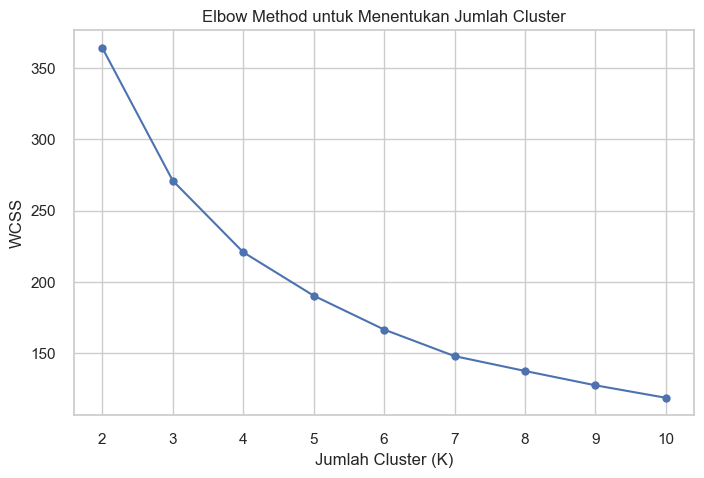

In [318]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_all_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.show()


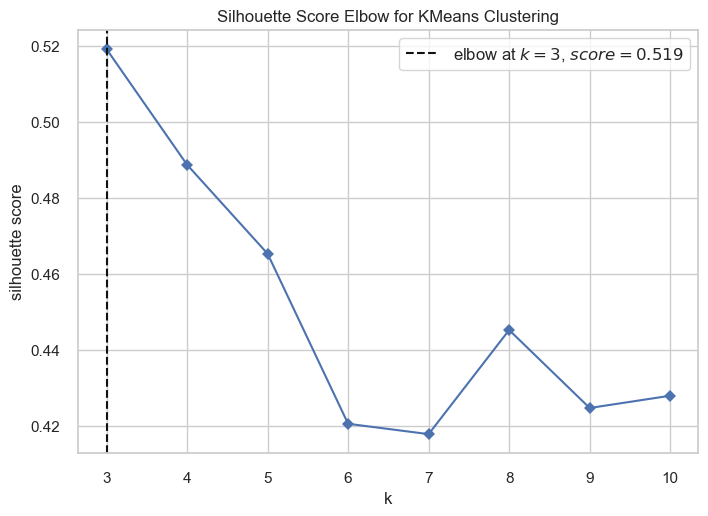

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [319]:
# Buat (instantiate) model clustering
model = KMeans()

### MULAI CODE ###

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                       k=(3,11),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df_used_all)

# Tampilkan plot
visualizer.show()

In [ ]:
# Build & fit KMeans final
kmeans_final = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans_final.fit_predict(df_used_all)

# Tambahkan label ke dataframe utama
df_master["cluster"] = cluster_labels


Model utama menggunakan K=3 untuk stabilitas interpretasi,

sementara K=4 digunakan untuk analisis lanjutan dalam mengidentifikasi segmen pengguna dengan perilaku finansial ekstrem

In [321]:
# Simpan KMeans final
joblib.dump(kmeans_final, "../models/kmeans_k3_model.pkl")

['../models/kmeans_k3_model.pkl']

In [322]:
# Jumlah user per cluster
df_master["cluster"].value_counts().sort_index()


cluster
0    102
1     38
2     60
Name: count, dtype: int64

In [323]:
# Rata-rata fitur per cluster
cluster_profile = df_master.groupby("cluster")[df_used_all.columns].mean()
cluster_profile


,age_group,monthly_income,log_avg_ticket_size,frequency,total_spend,spend_to_income_ratio,active_tenure_days
cluster,,,,,,,
0,1.284314,6.639216e+06,12.263832,65.647059,1.322337e+07,0.212047,217.725490
1,0.868421,2.072895e+07,13.338518,115.157895,7.256229e+07,0.319765,350.105263
2,0.866667,1.304667e+07,12.848514,100.916667,3.757030e+07,0.293041,317.083333


| Cluster | Persona                 | Profil Finansial   | Risiko          |
| ------- | ----------------------- | ------------------ | --------------- |
| 0       | Stable Spender          | Terkontrol & sehat | Rendah          |
| 1       | High Engagement Spender | Agresif & intens   | Menengah–Tinggi |
| 2       | Balanced Active User    | Aktif & berimbang  | Menengah        |


In [325]:
age_config = {
    "bins": [0, 24, 45, 100],
    "labels": ["Remaja", "Dewasa", "Lansia"]
}

joblib.dump(age_config, "../models/age_config.pkl")


['../models/age_config.pkl']

In [326]:
scaler = joblib.load("../models/robust_scaler.pkl")
age_encoder = joblib.load("../models/label_encoder_age.pkl")
age_config = joblib.load("../models/age_config.pkl")
AGE_BINS = age_config["bins"]
AGE_LABELS = age_config["labels"]
kmeans = joblib.load("../models/kmeans_k3_model.pkl")

In [346]:
def assign_new_user(user_dict):
    df = pd.DataFrame([user_dict])

    # 1. Age binning (HARUS sama seperti training)
    df["age_group"] = pd.cut(
        df["age"],
        bins=AGE_BINS,
        labels=AGE_LABELS,
        include_lowest=True
)

    df["age_group"] = age_encoder.transform(df["age_group"])

    # 3. Log transform (HARUS SAMA)
    df["log_avg_ticket_size"] = np.log1p(df["avg_ticket_size"])

    # 4. Ambil fitur final
    feature_cols = [
        "age_group",
        "monthly_income",
        "log_avg_ticket_size",
        "frequency",
        "total_spend",
        "spend_to_income_ratio",
        "active_tenure_days"
    ]

    X = df[feature_cols]

    # 5. Scaling
    X_scaled = scaler.transform(X)

    # 6. Predict cluster
    cluster = kmeans.predict(X_scaled)[0]

    # 7. Persona mapping
    persona_map = {
        0: "Stable Spender",
        1: "Elite High Spender",
        2: "High Engagement Spender"
    }

    return {
        "cluster": int(cluster),
        "persona": persona_map.get(cluster, "Unknown")
    }


In [328]:
print(hasattr(scaler, "center_"))

True


In [ ]:
new_user = {
    "age": 29,
    "monthly_income": 8_000_000,
    "avg_ticket_size": 250_000,
    "frequency": 300,
    "total_spend": 30_000_000,
    "spend_to_income_ratio": 0.8,
    "active_tenure_days": 240
}

In [349]:
user_cautious = {
    "age": 24,
    "monthly_income": 4_500_000,
    "avg_ticket_size": 120_000,
    "frequency": 40,
    "total_spend": 4_500_000,
    "spend_to_income_ratio": 0.20,
    "active_tenure_days": 180
}
assign_new_user(user_cautious)

{'cluster': 0, 'persona': 'Stable Spender'}

In [350]:
user_risky = {
    "age": 35,
    "monthly_income": 12_000_000,
    "avg_ticket_size": 600_000,
    "frequency": 110,
    "total_spend": 55_000_000,
    "spend_to_income_ratio": 0.46,
    "active_tenure_days": 330
}
assign_new_user(user_risky)

{'cluster': 2, 'persona': 'High Engagement Spender'}

In [348]:
user_stable = {
    "age": 30,
    "monthly_income": 8_000_000,
    "avg_ticket_size": 250_000,
    "frequency": 60,
    "total_spend": 15_000_000,
    "spend_to_income_ratio": 0.25,
    "active_tenure_days": 280
}
assign_new_user(user_stable)

{'cluster': 0, 'persona': 'Stable Spender'}

In [342]:
user_low_activity = {
    "age": 22,
    "monthly_income": 3_000_000,
    "avg_ticket_size": 80_000,
    "frequency": 12,
    "total_spend": 1_000_000,
    "spend_to_income_ratio": 0.10,
    "active_tenure_days": 40
}

assign_new_user(user_low_activity)


{'cluster': 0, 'persona': 'Stable Spender'}

In [347]:
user_elite = {
    "age": 38,
    "monthly_income": 22_000_000,     # income tinggi
    "avg_ticket_size": 650_000,        # ticket besar
    "frequency": 130,                  # sangat aktif
    "total_spend": 72_000_000,         # sangat besar
    "spend_to_income_ratio": 0.33,     # tinggi tapi realistis
    "active_tenure_days": 360           # user lama
}

assign_new_user(user_elite)


{'cluster': 1, 'persona': 'Elite High Spender'}